<a href="https://colab.research.google.com/github/Dhanno08/Netflix/blob/main/Business_Case_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author- Dhananjay *Yadav*

#Google Colab link
https://colab.research.google.com/drive/150ZhC-sg5uSKVG58Rj9A2pL137i4S368?usp=sharing

Please refer the colab link in case if there are some part missing or hidden in PDF file. Thanks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

from tabulate import tabulate
from scipy.stats import norm

In [3]:
#downloaded the dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-09-16 06:25:52--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.94, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M   118MB/s    in 0.2s    

2023-09-16 06:25:52 (118 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



#Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [4]:
#load the dataset into a Dataframe
data= pd.read_csv('walmart.csv')

Problem Statement: The management of Walmart collected the transactional data of customers and want to analyse the purchase characteristics of the customers during the Black Friday sale.
Datataset has Different columns like User_ID, Product_ID,Gender,Age,Occupation,City_Category,Stay_IN_Current_City_Tears,Marital_Status,Product_Category and Purchase.
The main aim is to find the purchase according to male and female as if Who spends more during the Black Friday sale.
1. Male spent vs Female_spent
2.Married / Unmarried
3.Age wise
Different Categories are(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'])

In [5]:
# Display the first 10 rows of the dataset to get an overview
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
# Check the shape of the dataset
data.shape

(550068, 10)

There are 550068 or 5.5 million is the number of rows and 10 columns in the dataset

In [7]:
# Check the structure and data types of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


As we can check there is no null values in the dataset and there are 5 numerical columns and  5 categorical columns

In [8]:
#The column name available in dataset
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [34]:
df= data.copy()

In [10]:
#Creating one more column categorical saying User Married or Unmarried. provided 0 for Unmarried and 1 for Married

In [150]:
def Marital_Status_Category(val):
    if val == 0 :
        return "Unmarried"
    else:
        return "Married"
df["Marital_Status_category"] = df["Marital_Status"].apply(Marital_Status_Category)
##Sample space = ("Married, Unmarried")

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [151]:
df.describe(include= "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status_category,550068,2,Unmarried,324731


#From the above table we can infer that
1.The most popular product is P00265242

2.Unmarried people are more contributed in the Black Friday Sale

3.Specially unmarried Male are the Top contributors is what can infer from the column Married Gender.

In [14]:
#converting Stay_In_Current_City_Years  into category
#Replace '4+' to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype("category")

In [15]:
#Conversion of categorical attributes to 'category'
categorical_columns = ["Gender", "Age", "City_Category", "Product_Category"]
df[categorical_columns] = df[categorical_columns].astype("category")

In [16]:
data.index

RangeIndex(start=0, stop=550068, step=1)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
 10  Marital_Status_category     550068 non-null  object  
dtypes: category(5), int64(4), object(2)
memory usage: 27.8+ MB


# Calculating unique values

In [19]:
categorical_columns = df.select_dtypes(include=['category']).columns
from tabulate import tabulate
# Iterate through categorical columns
for column in categorical_columns:
    unique_values = df[column].value_counts().reset_index()
    unique_values.columns = [column, 'Count']
    table = tabulate(unique_values, headers='keys', tablefmt='pretty', showindex=False)

    print(f"\nUnique values for {column}:")
    print(table)


Unique values for Gender:
+--------+--------+
| Gender | Count  |
+--------+--------+
|   M    | 414259 |
|   F    | 135809 |
+--------+--------+

Unique values for Age:
+-------+--------+
|  Age  | Count  |
+-------+--------+
| 26-35 | 219587 |
| 36-45 | 110013 |
| 18-25 | 99660  |
| 46-50 | 45701  |
| 51-55 | 38501  |
|  55+  | 21504  |
| 0-17  | 15102  |
+-------+--------+

Unique values for City_Category:
+---------------+--------+
| City_Category | Count  |
+---------------+--------+
|       B       | 231173 |
|       C       | 171175 |
|       A       | 147720 |
+---------------+--------+

Unique values for Stay_In_Current_City_Years:
+----------------------------+--------+
| Stay_In_Current_City_Years | Count  |
+----------------------------+--------+
|             1              | 193821 |
|             2              | 101838 |
|             3              | 95285  |
|             4              | 84726  |
|             0              | 74398  |
+----------------------------+

In [20]:
# Check summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


data.describe() describes Numerical columns as count,mean.std,min,25%,50%,75%,and max.

In [21]:
df.describe(include= "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Marital_Status_category,550068,2,Unmarried,324731


data.describe(include='object') describes categorical columns like Product_ID and Marital_Status_category

In [22]:
#Get TOP 10 product sold during sale.
temp=df['Product_ID'].value_counts().reset_index()
temp.columns=['Product_ID','Count']
temp=temp.sort_values(by='Count', ascending=False)
temp.head(10)

,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


The top 10 sold product IDs are mentioned above with its total count of sales. P00265242 is the Top selling Product

In [23]:
#Top 10 product sold as per revenue
temp=df.groupby(['Product_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
1030,P00112142,24216006
1018,P00110942,23639564
2263,P00237542,23425576
565,P00057642,23102780
104,P00010742,22164153


The total sum of each product during Black Friday sale is shown in the above table. These are the TOP 10 contributing Products in our revenue.

In [24]:
#Top 10 customer contributing in Black Friday sale
temp=df.groupby(['User_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


These are the TOP 10 customers contributing in black Friday sale.

#2. Non-Graphical Analysis: Value counts and unique attributes ​

In [25]:
# Check unique values in columns
unique_values = df.nunique().reset_index()
unique_values.columns = ['Column', 'Unique Values']
table= tabulate(unique_values, headers = 'keys', tablefmt='pretty', showindex= False)
print(table)

+----------------------------+---------------+
|           Column           | Unique Values |
+----------------------------+---------------+
|          User_ID           |     5891      |
|         Product_ID         |     3631      |
|           Gender           |       2       |
|            Age             |       7       |
|         Occupation         |      21       |
|       City_Category        |       3       |
| Stay_In_Current_City_Years |       5       |
|       Marital_Status       |       2       |
|      Product_Category      |      20       |
|          Purchase          |     18105     |
|  Marital_Status_category   |       2       |
+----------------------------+---------------+


Purchase is the amount of purchase. it is continuous variables.

User_ID,Product_ID are for identification purpose.

Gender, Age, Occupation,city_category,Stay_In_Current_City_Years,Marital_status,product_category are Categorical Variables.

In [ ]:
#To show the a tabular data of unique values of all the columns

results_table= []

# Compute and display value counts and unique attributes for each column
for column in df.columns:
    # Calculate value counts
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns= ['Value', 'Count']

    # Calculate unique attributes
    unique_attributes = ', '.join(map(str, df[column].unique()))

    #append table to the table
    results_table.append({
        'Column': column,
        'Value Counts': tabulate(value_counts, headers='keys', tablefmt='pretty', showindex=False),
        'Unique Attributes': unique_attributes
    })

# Print the results table
table = tabulate(results_table, headers='keys', tablefmt='pretty', showindex=False)
print(table)

Getting runtime error in this due to system crash

In [26]:
# Iterate through every column in the DataFrame
for column in df.columns:
    # Calculate value counts
    value_counts = df[column].value_counts()

    # Calculate unique attributes
    unique_attributes = df[column].unique()

    # Display results
    print(f"Column: {column}")
    print("-"*20)
    print("Value Counts:")
    print(value_counts)
    print("\nUnique Attributes:")
    print(unique_attributes)
    print("-"*60)
    print("\n")

Column: User_ID
--------------------
Value Counts:
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Unique Attributes:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
------------------------------------------------------------


Column: Product_ID
--------------------
Value Counts:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Unique Attributes:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
------------------------------------------------------------


Column: Gender
--------------------
Value Counts:
M    414259
F    135809
Name: Gender, dtype: int64

Unique Attributes:
['F', 'M']
Cat

#Visual Analysis - Univariate & Bivariate
##For continuous variable(s): Distplot, countplot, histogram for univariate analysis
###The continuous variable are Purchase, product_category and Occupation

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_Status_category
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Unmarried
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Unmarried
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Unmarried
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Unmarried
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Unmarried


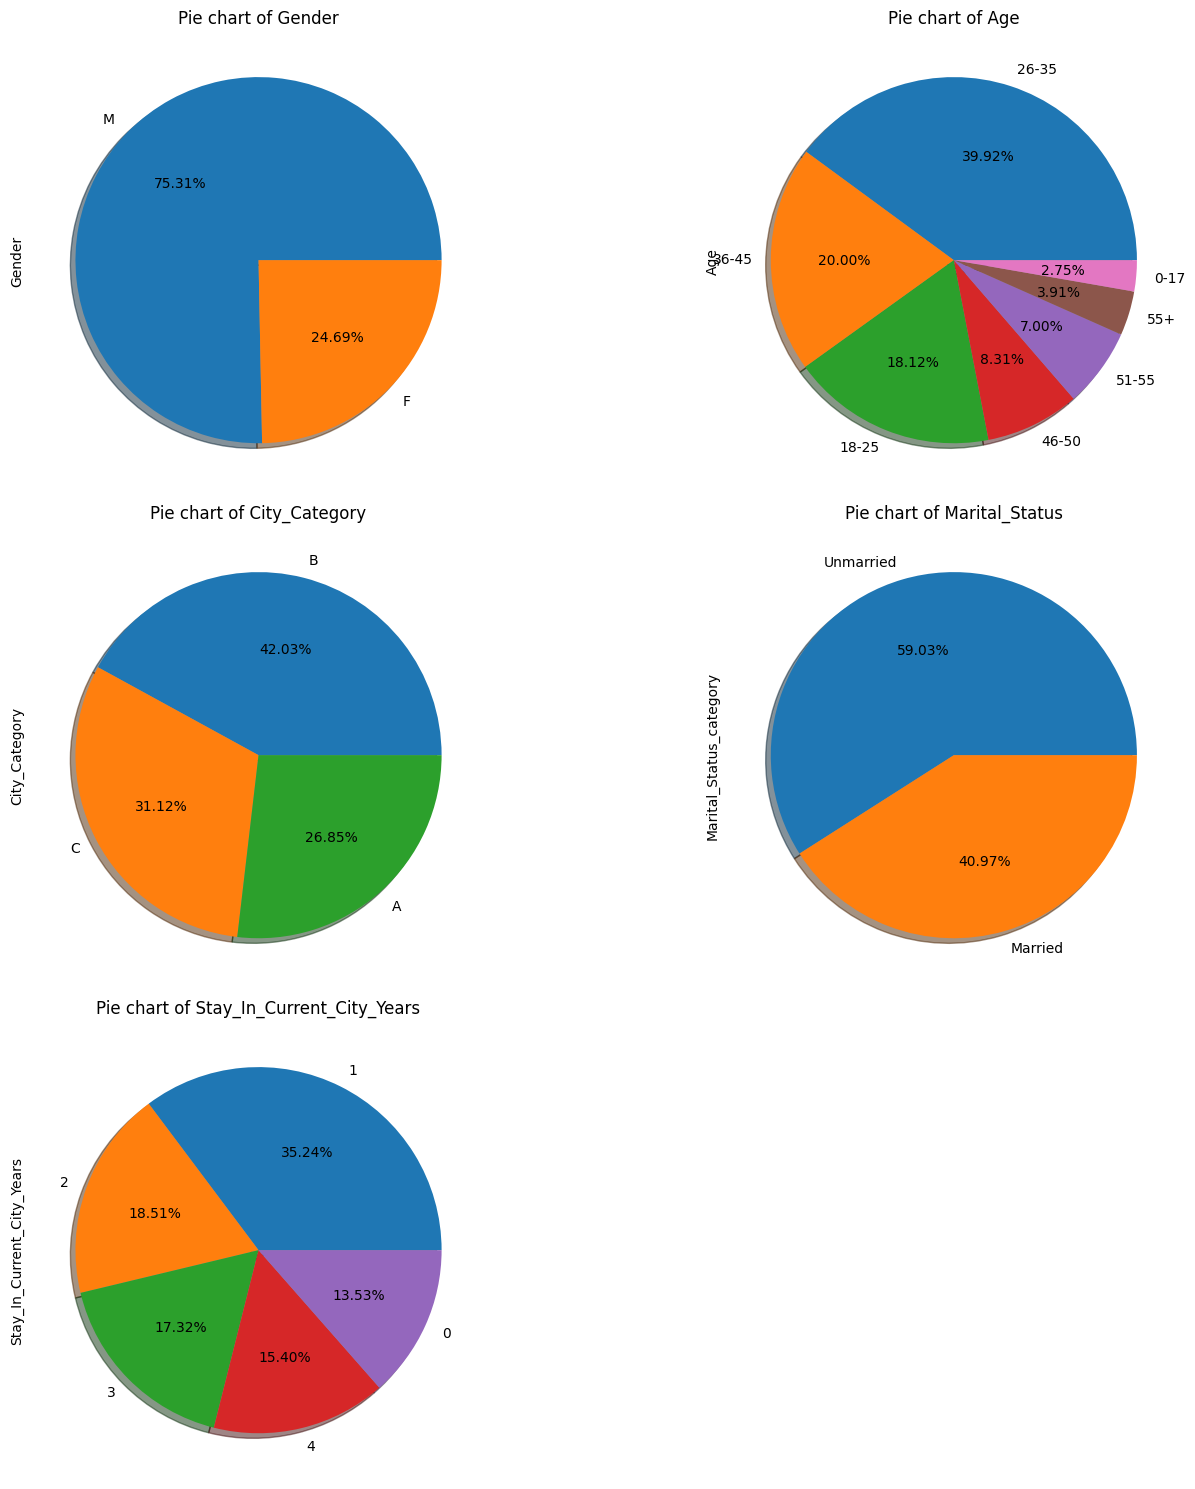

In [28]:
plt.figure(figsize=(15, 15))

# Plot the pie chart for Gender
plt.subplot(3, 2, 1)
df['Gender'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title("Pie chart of Gender")

# Plot the pie chart for Age
plt.subplot(3, 2, 2)
df['Age'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title("Pie chart of Age")

# Plot the pie chart for City_Category
plt.subplot(3, 2, 3)
df['City_Category'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title("Pie chart of City_Category")

# Plot the pie chart for Marital_Status
plt.subplot(3, 2, 4)
df['Marital_Status_category'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title("Pie chart of Marital_Status")

# Plot the pie chart for Stay_In_Current_City_Years with explode effect
plt.subplot(3, 2, 5)
explode = (0.1, 0, 0, 0)  # Explode the first slice
df['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title("Pie chart of Stay_In_Current_City_Years")

plt.tight_layout()

plt.show()


##we can observe that the follwoing insights from the plots-

1. That the 75.31% population in the dataset are male and remaining 24.69% are female.
2. That 39.92% of customers are in the age group in 26-35 years followed by 20% of 36-45 years of age group.
3. That 42.03% customers are from city B followed by City C with 31.12%.
4. The marital status of 59.03% of customers are  Unmarried and 40.97% are married
5. The highest number of customers are in the city for 1 year followed by 2 year of stay.

##Distplot

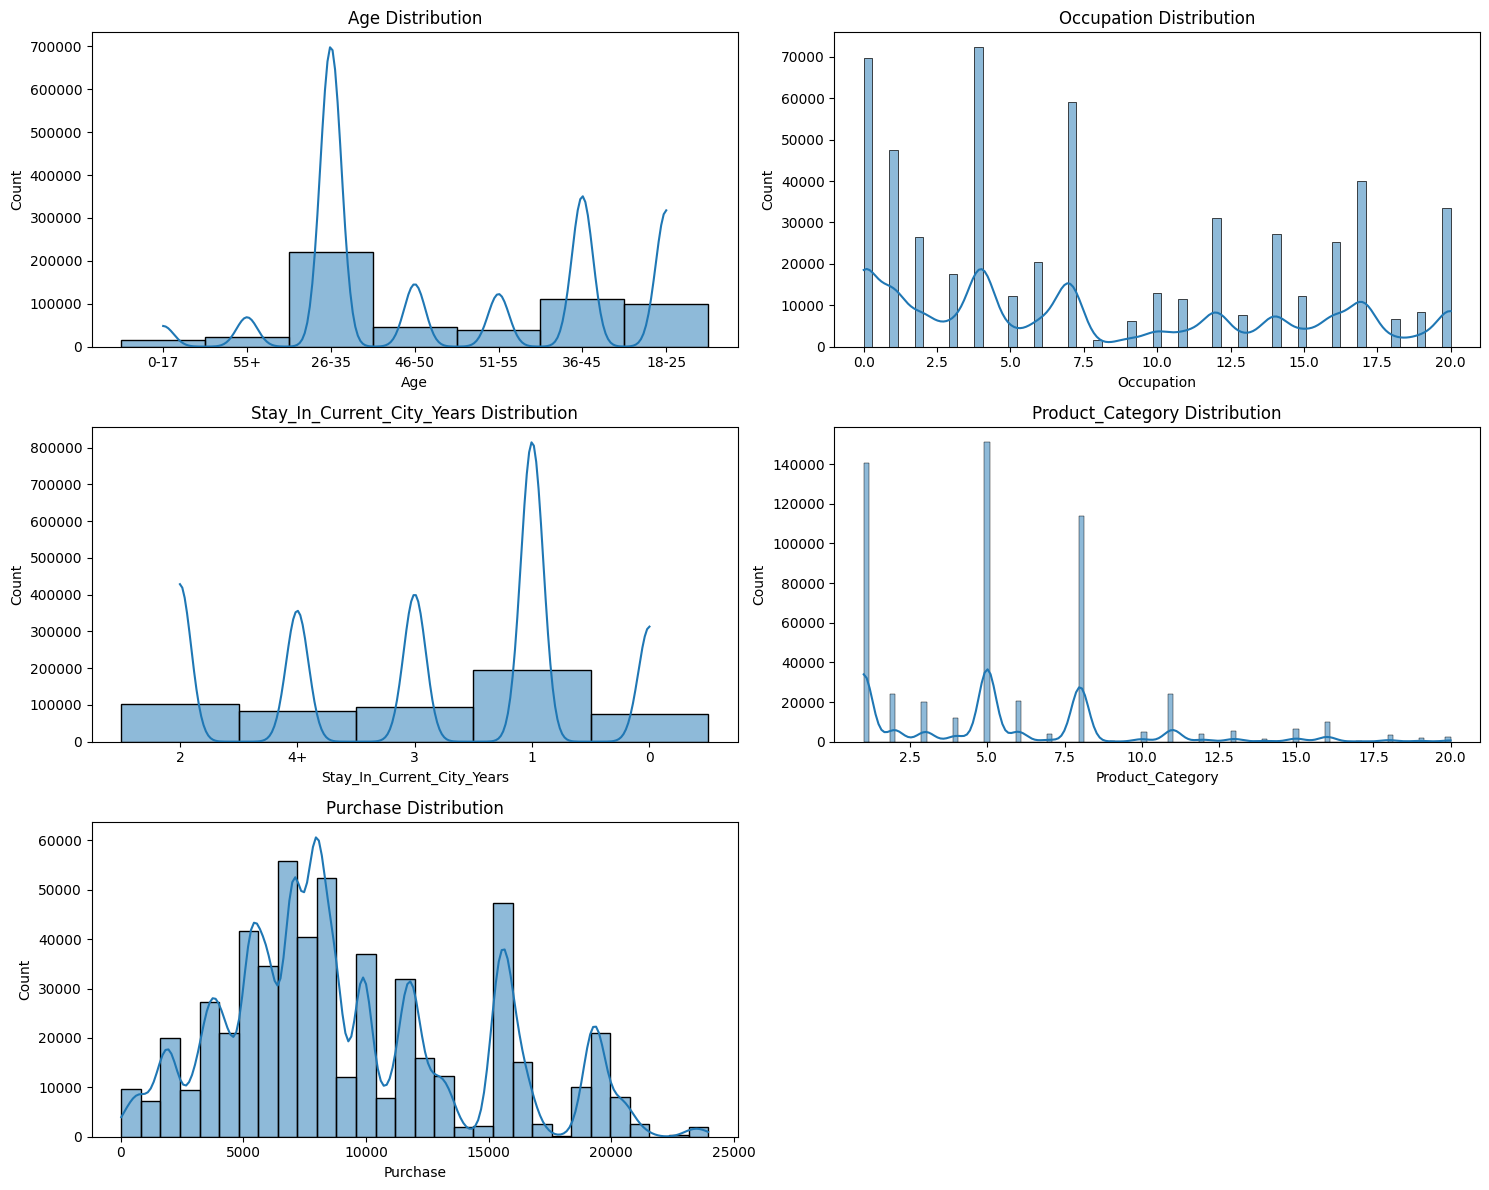

In [35]:
plt.figure(figsize=(15, 12))

# Create subplots for each distribution
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Age', kde=True, edgecolor='black')
plt.title('Age Distribution')
plt.grid(False)

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Occupation', kde=True, edgecolor='black')
plt.title('Occupation Distribution')
plt.grid(False)

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='Stay_In_Current_City_Years', kde=True, edgecolor='black')
plt.title('Stay_In_Current_City_Years Distribution')
plt.grid(False)

plt.subplot(3, 2, 4)
sns.histplot(data=df, x='Product_Category', kde=True, edgecolor='black')
plt.title('Product_Category Distribution')
plt.grid(False)

plt.subplot(3, 2, 5)
sns.histplot(data=df, x='Purchase', kde=True, bins=30, edgecolor='black')
plt.title('Purchase Distribution')
plt.grid(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Obseravation from above Histplot are as follws-
1. If we talk about age distibution the maximum customer fall in 26-35 years of age category followed by 36-45 years of Age.
2. In occupation distribution most of the customer are between 0.0 to 7.5
3. In case of stay in city most of the customer are in city for 1 year followed 2 year
4. In product category the product category 5 have most number of customers with count of more than 140000 follwed by product category 1 and 8.
5. In Purchase distribution most of the customer made the purchase between 4800 to 10500.

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##Countplot

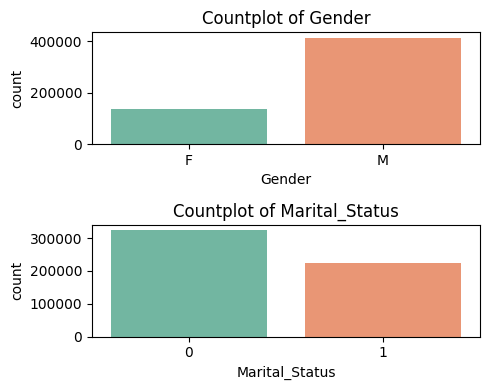

In [37]:
#countplot for univariate variables
category_variables = ["Gender", "Marital_Status"]

# Create subplots for count plots
fig, axes = plt.subplots(len(category_variables), 1, figsize=(5, 4))

# Create count plots for each categorical variable
for i, var in enumerate(category_variables):
    sns.countplot(data=data, x=var, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Countplot of {var}')

plt.tight_layout()
plt.show()

We can observe that-

1. The number of male customer are more as compared to Female and we do not have any third Gender.
2. The number of unmarried customer are more as compared to married.

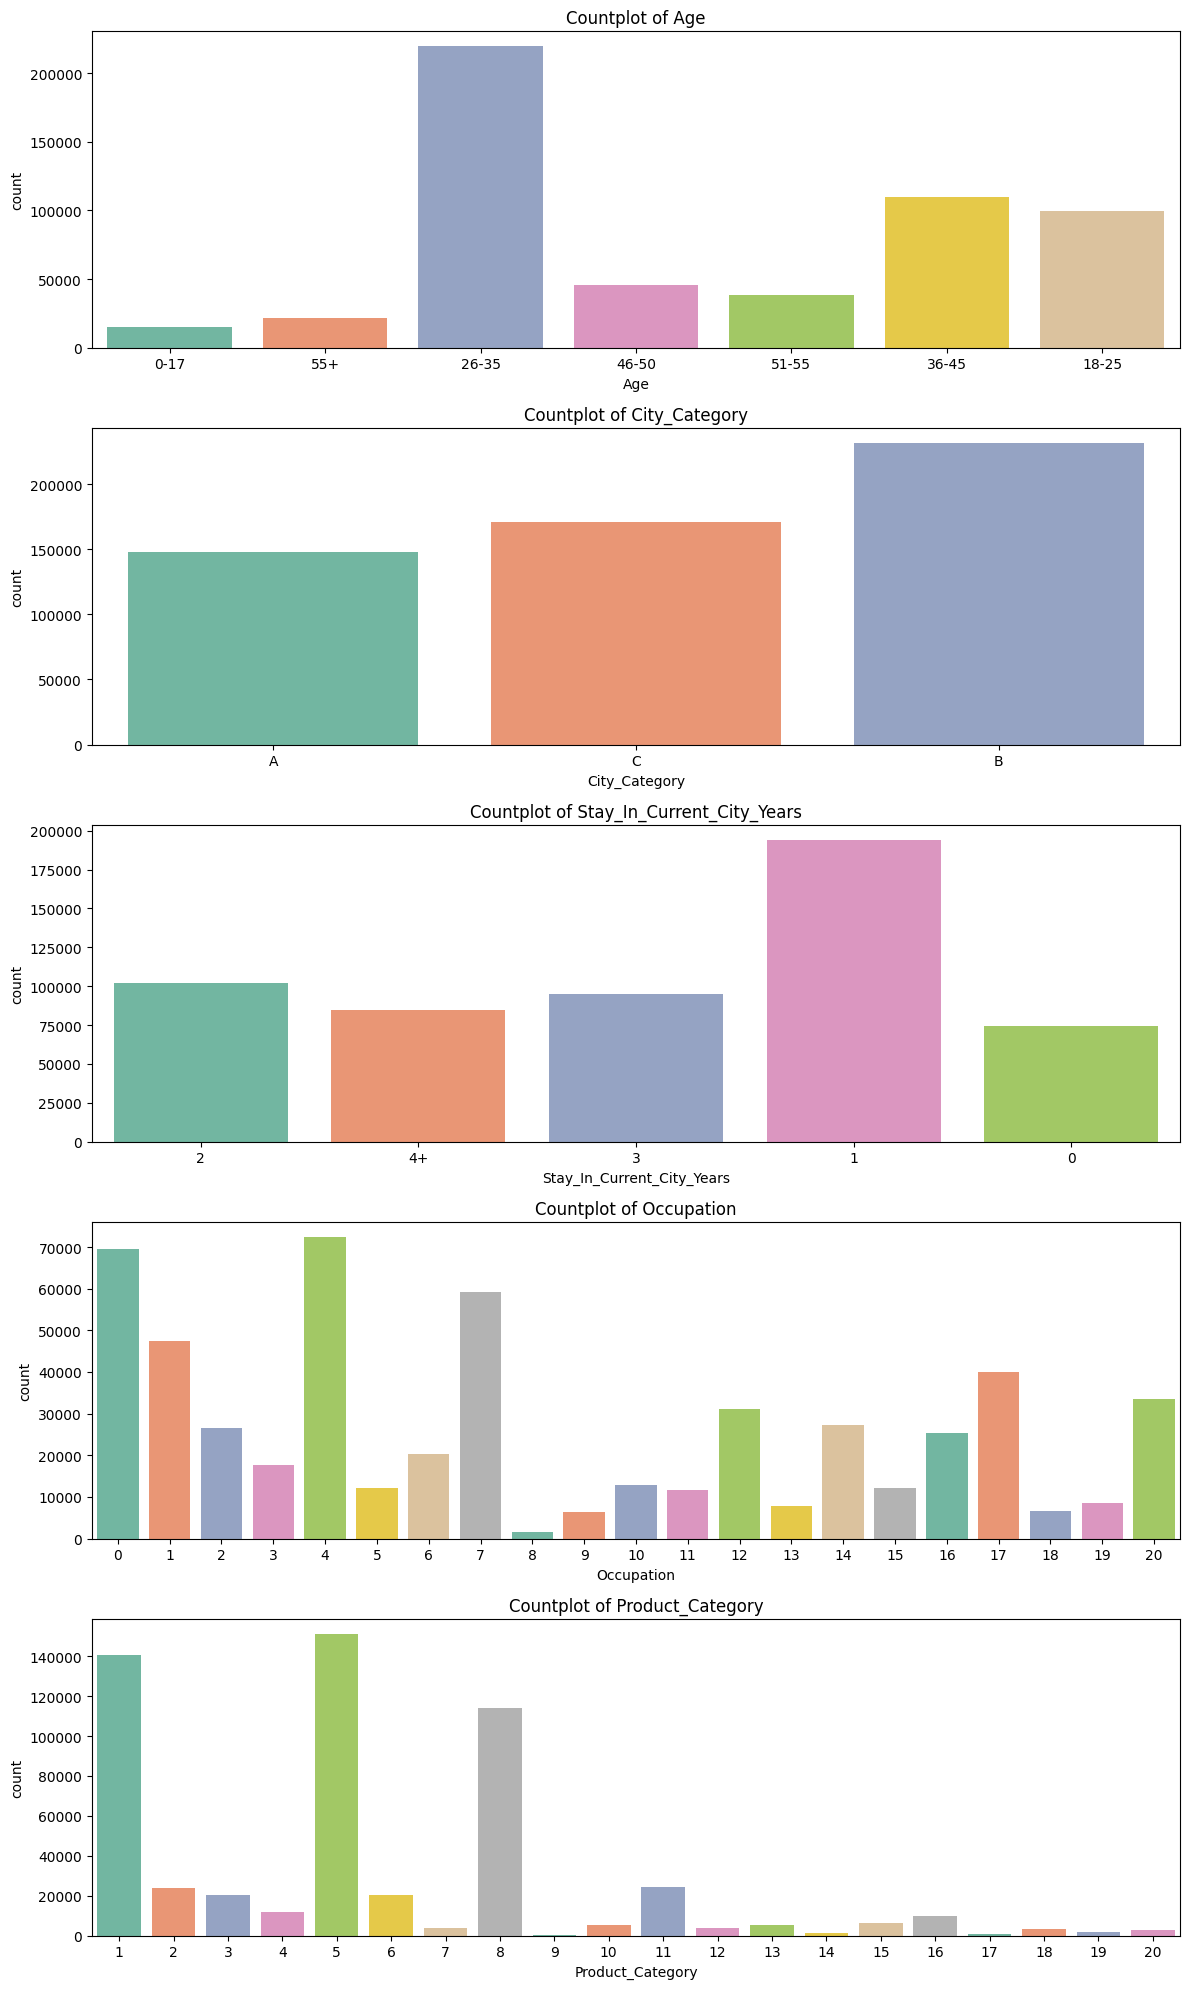

In [38]:
#countplot for univariate variables
category_variables = ["Age", "City_Category", "Stay_In_Current_City_Years", "Occupation","Product_Category"]

# Create subplots for count plots
fig, axes = plt.subplots(len(category_variables), 1, figsize=(12, 20))

# Create count plots for each categorical variable
for i, var in enumerate(category_variables):
    sns.countplot(data=data, x=var, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Countplot of {var}')

plt.tight_layout()
plt.show()

We can observe that-
1. Most of the customer are in the age category of 25-35 who made the purchase during sale.
2. Most of the customer lives in City_Catogary B followed by C then A.
3. Most of the customer who made the purchase at the time of sale are living ofr one year in the city followed by 2.
4. Most of the customer are in the occupation category of 4 follwed by 0 then 7.
5. Highest selling product is 5 follwed by 1 then 8.

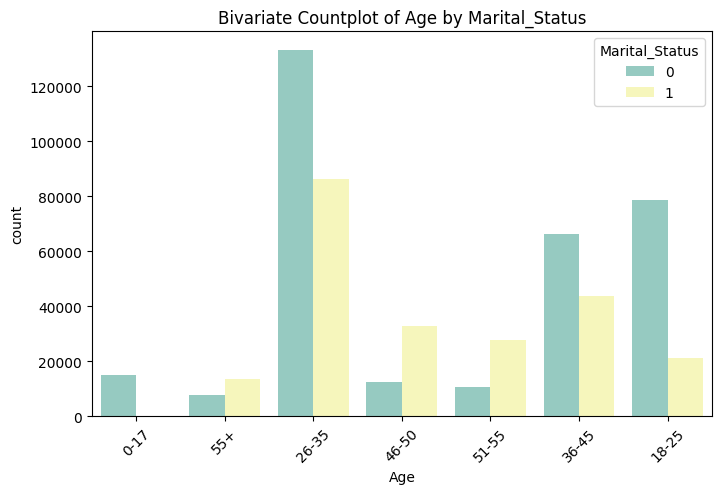

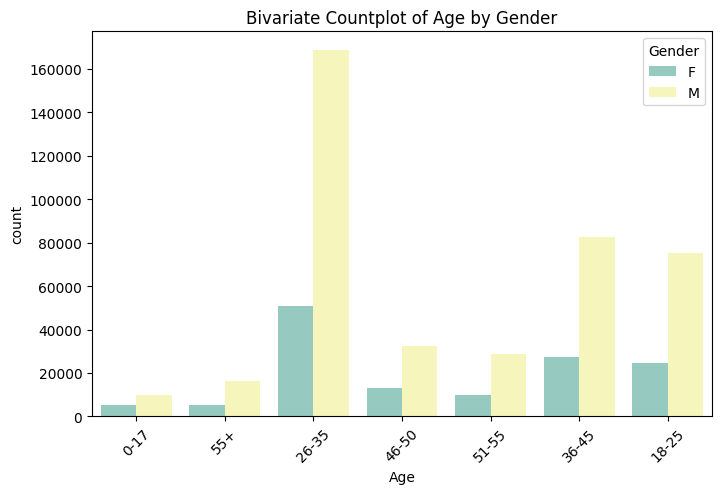

In [39]:
#countplot with hue
pairs = [
    ("Age", "Marital_Status"),
    ("Age", "Gender")
]

# Create bivariate countplots for each pair of variables
for x_var, hue_var in pairs:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=x_var, hue=hue_var, palette="Set3")
    plt.title(f'Bivariate Countplot of {x_var} by {hue_var}')
    plt.xlabel(x_var)
    plt.legend(title=hue_var)
    plt.xticks(rotation=45)
    plt.show()

1. We can infer that mostly unmarried people from age group  18-25 to 36-45 are more active in black friday sale.
2. Males in the age group 26-35 are more active in blackfriday sale.

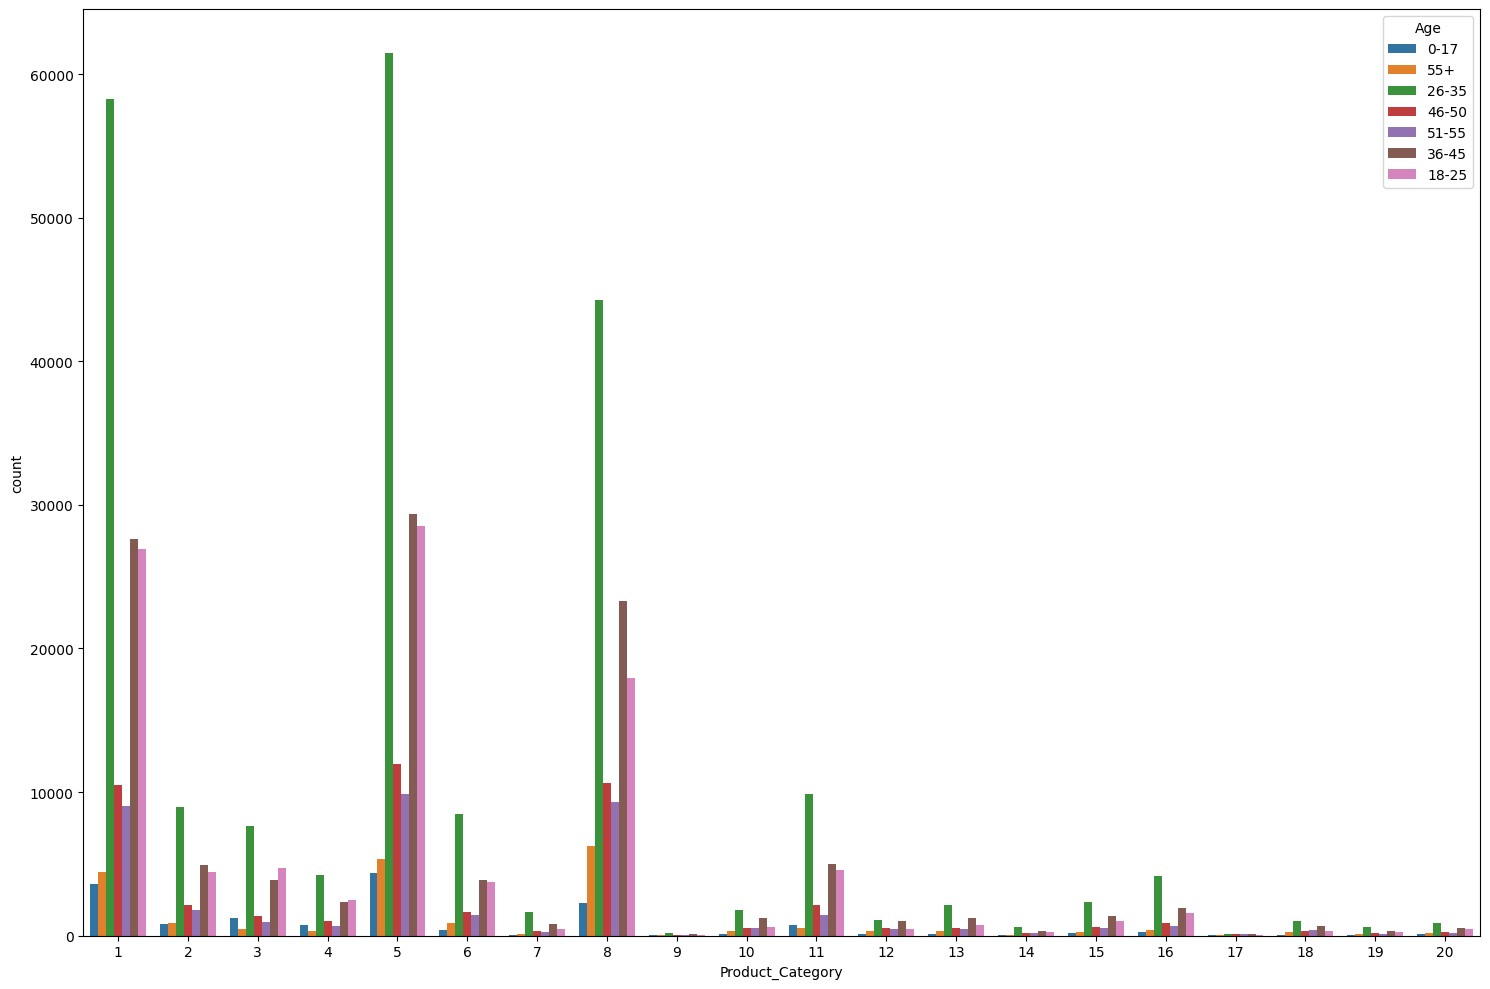

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Product_Category'], hue=df['Age'])
plt.tight_layout()
plt.show()

Product 1, 5 and 8 are the highest purchased and biggest contributor is the age category 26-35.

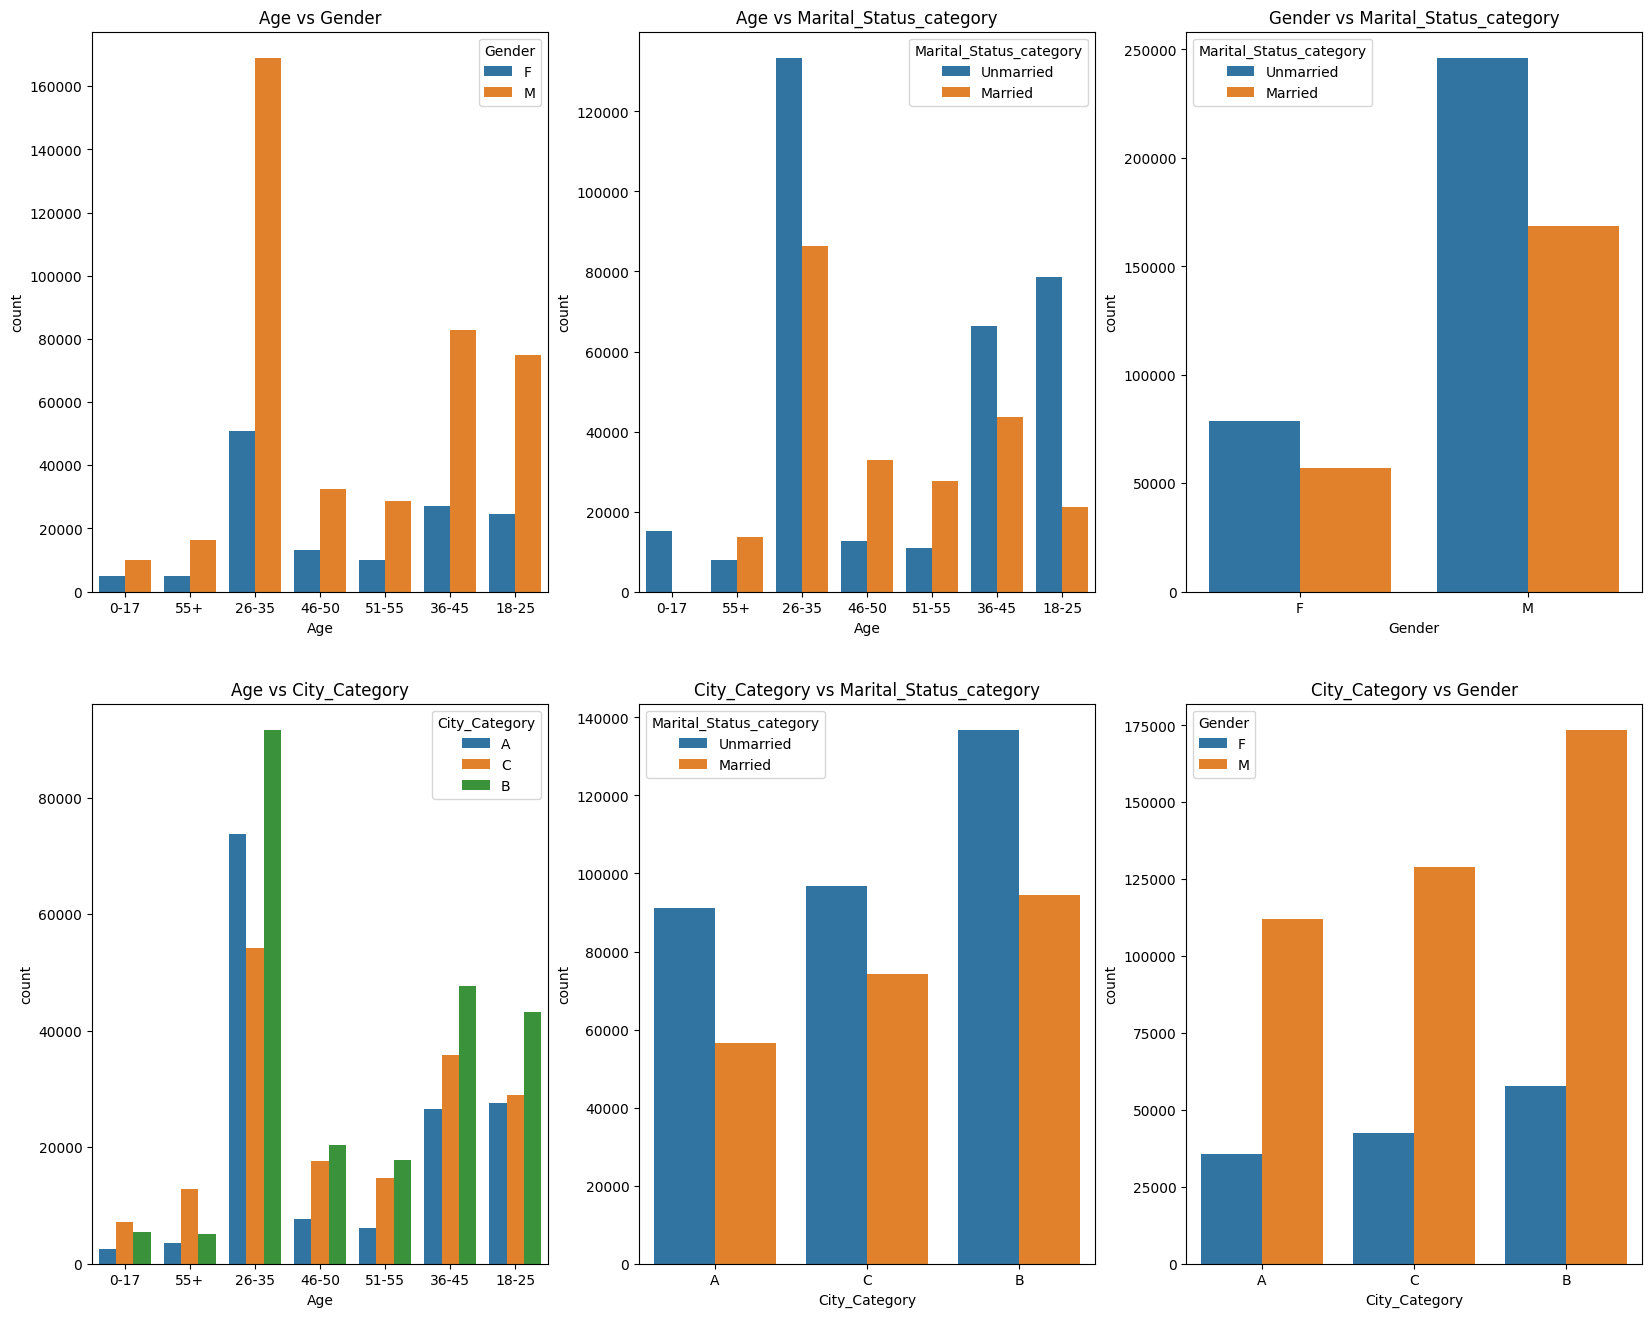

In [248]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20,16))
sns.countplot(x = "Age", hue ="Gender", data = df, ax=axis[0,0])
sns.countplot(x = "Age", hue ="Marital_Status_category", data = df, ax=axis[0,1])
sns.countplot(x = "Gender", hue ="Marital_Status_category", data = df, ax=axis[0,2])
sns.countplot(x = "Age", hue ="City_Category", data = df, ax=axis[1,0])
sns.countplot(x = "City_Category", hue ="Marital_Status_category", data = df, ax=axis[1,1])
sns.countplot(x = "City_Category", hue ="Gender", data = df, ax=axis[1,2])

axis[0,0].set_title("Age vs Gender")
axis[0,1].set_title("Age vs Marital_Status_category")
axis[0,2].set_title("Gender vs Marital_Status_category")
axis[1,0].set_title("Age vs City_Category")
axis[1,1].set_title("City_Category vs Marital_Status_category")
axis[1,2].set_title("City_Category vs Gender")

plt.show()

1. Age Vs Gender- The ration of male in every age group is higher as compared to female.
2. Age VS Marital Status Category- The highest number of Unmarried customer are in the age group of 26-35. Upto age of 45 the ratio of unmarried customer are more and after that the ration of mariied couple increase.
3. Gender VS Marital Status Category- In this most of the customer are unmarried.
4. Age VS City Category- in age group of 0-17 most people leave in city C follwed by B and A. In age group of 18-25, most customer live in city B. In 26-35, most customer live in City B. In 36-45, most customer live in City B. and so on. the pattern is same except the age group 0-17 and 55+, they mostly leave in City C.
5. City Category VS Marital Status Category- The pattern of marital status in all the three city category are same as there are more unmarried customer as compared to married customer.
6. City Category VS Gender- The patter of male and female living in all the 3 city category is same.



##Boxplot



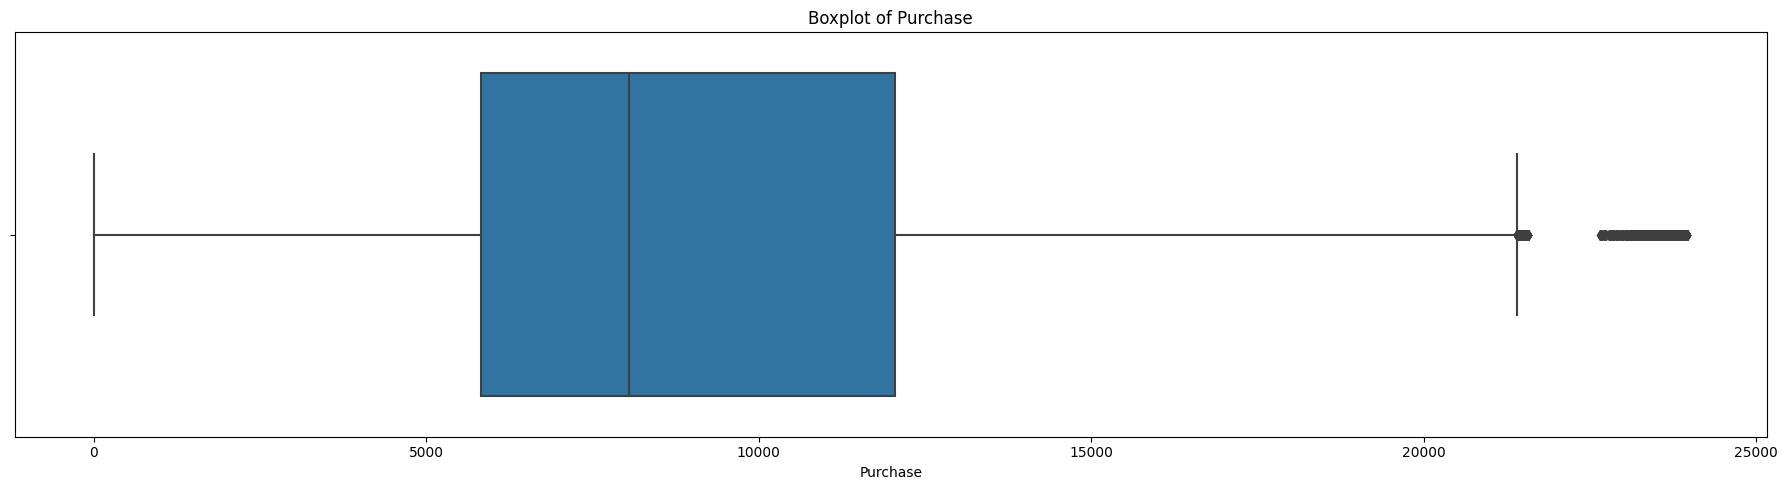

In [41]:
plt.figure(figsize=(18,5))

sns.boxplot(data=df, x='Purchase')
plt.title('Boxplot of Purchase')

plt.tight_layout()
plt.show()

We can observe that the Purchase have outliers.

In [42]:
df1= df.copy()

## Correlation using Heatmap

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df1['Age_encoded'] = labelencoder.fit_transform(df['Age']) #fitting and transforming the desired categorical column.
df1['City_Category_encoded'] = labelencoder.fit_transform(df['City_Category']) #fitting and transforming the desired categorical column.
df1['Gender_encoded'] = labelencoder.fit_transform(df['Gender'])
df1['Marital_Status_encoded'] = labelencoder.fit_transform(df['Marital_Status'])

In [44]:
Coulumns_to_drop= ["City_Category","Gender","Age", "Marital_Status"]
df1= df1.drop(Coulumns_to_drop, axis=1)

In [45]:
df1.corr()

,User_ID,Occupation,Product_Category,Purchase,Age_encoded,City_Category_encoded,Gender_encoded,Marital_Status_encoded
User_ID,1.000000,-0.023971,0.003825,0.004716,0.032698,0.022859,-0.033474,0.020443
Occupation,-0.023971,1.000000,-0.007618,0.020833,0.091463,0.034479,0.117291,0.024280
Product_Category,0.003825,-0.007618,1.000000,-0.343703,0.061197,-0.014364,-0.045594,0.019888
Purchase,0.004716,0.020833,-0.343703,1.000000,0.015839,0.061914,0.060346,-0.000463
Age_encoded,0.032698,0.091463,0.061197,0.015839,1.000000,0.123079,-0.004262,0.311738
City_Category_encoded,0.022859,0.034479,-0.014364,0.061914,0.123079,1.000000,-0.004515,0.039790
Gender_encoded,-0.033474,0.117291,-0.045594,0.060346,-0.004262,-0.004515,1.000000,-0.011603
Marital_Status_encoded,0.020443,0.024280,0.019888,-0.000463,0.311738,0.039790,-0.011603,1.000000


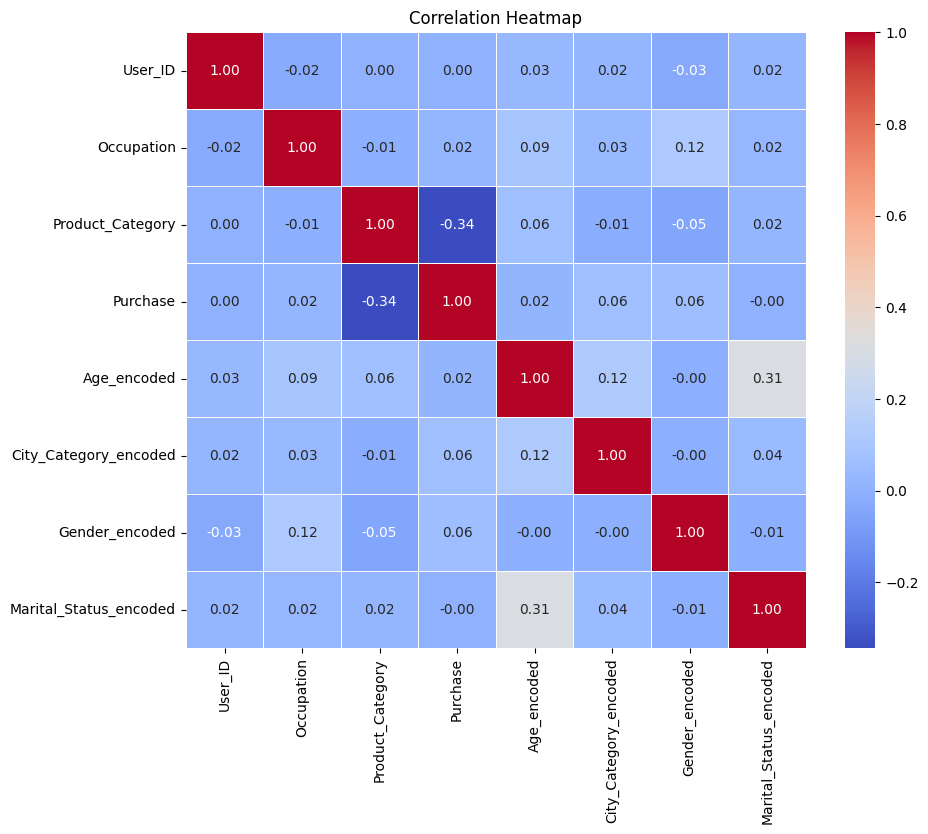

In [46]:
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation using Pairplot

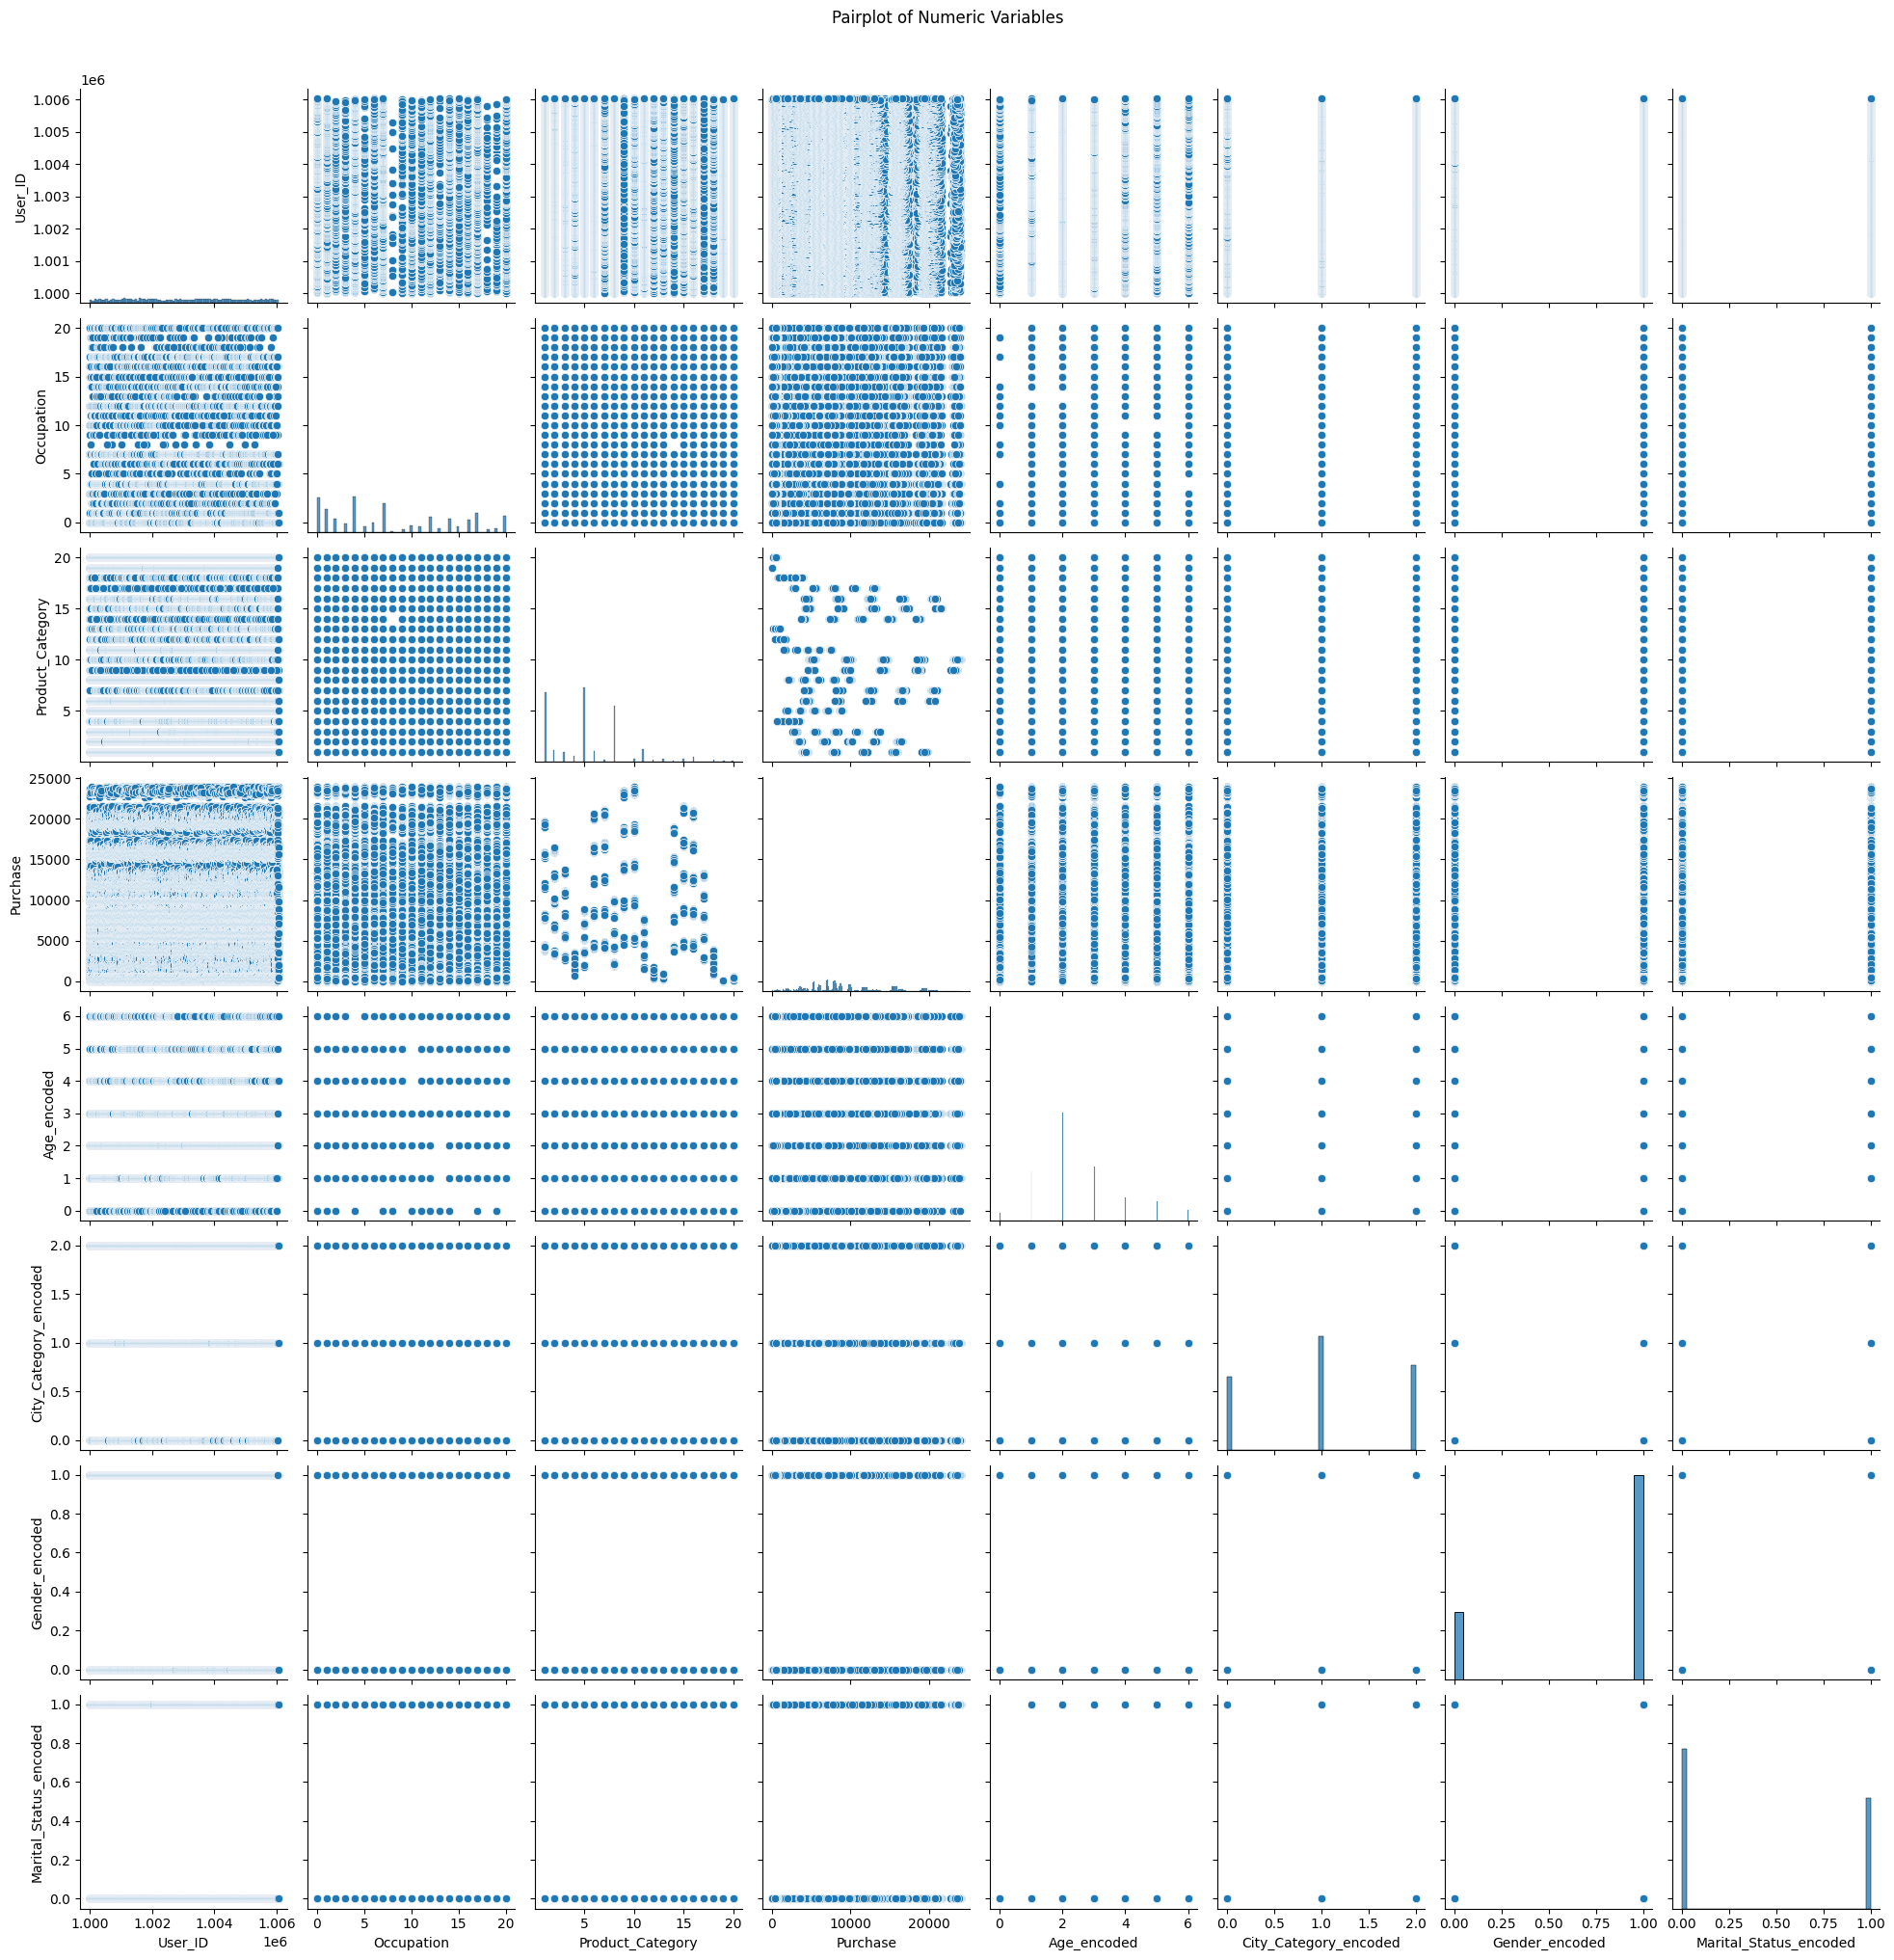

In [47]:
# Create a pairplot
sns.pairplot(df1)
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Occupation                  550068 non-null  int64   
 3   Stay_In_Current_City_Years  550068 non-null  category
 4   Product_Category            550068 non-null  category
 5   Purchase                    550068 non-null  int64   
 6   Marital_Status_category     550068 non-null  object  
 7   Married_Gender              550068 non-null  category
 8   Age_encoded                 550068 non-null  int64   
 9   City_Category_encoded       550068 non-null  int64   
 10  Gender_encoded              550068 non-null  int64   
 11  Marital_Status_encoded      550068 non-null  int64   
dtypes: category(3), int64(7), object(2)
memory usage: 39.3+ MB

#Missing Value & Outlier Detection

##Finding missing value and Percentage of missing value

In [79]:
missing_values = df.isna().sum()

# To also check for missing values encoded as 'NaN' or 'None' (common in Python)
# missing_values = df.isin(['NaN', 'None']).sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# If you want to calculate the percentage of missing values in each column:
total_rows = len(df)
missing_percent = (missing_values / total_rows) * 100
print("Percentage of Missing Values in Each Column:")
print(missing_percent)

Missing Values in Each Column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
Marital_Status_category       0
Married_Gender                0
dtype: int64
Percentage of Missing Values in Each Column:
User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
Marital_Status_category       0.0
Married_Gender                0.0
dtype: float64


##Outlier detection

We have Purchase Column which is a continuous for which we can check the outilers

In [48]:
df[["Purchase"]].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Method 1- IQR

In [49]:
Q1 = df[["Purchase"]].quantile(0.25)
Q3 = df[["Purchase"]].quantile(0.75)
IQR = Q3 -Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
print(lower_limit)
print(upper_limit)

Purchase   -3523.5
dtype: float64
Purchase    21400.5
dtype: float64


In [50]:
df_new = df[(df["Purchase"] < upper_limit.values[0]) & (df["Purchase"] > lower_limit.values[0])]

In [51]:
df_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [52]:
Data_loss= 550068- 547391
print("Data_loss- ", Data_loss)
per_loss= round((Data_loss/550068)*100,2)
print("per_loss- ", per_loss, "%")
Data_left= round((100- per_loss),2)
print("Data_left - ", Data_left,"%")

Data_loss-  2677
per_loss-  0.49 %
Data_left -  99.51 %


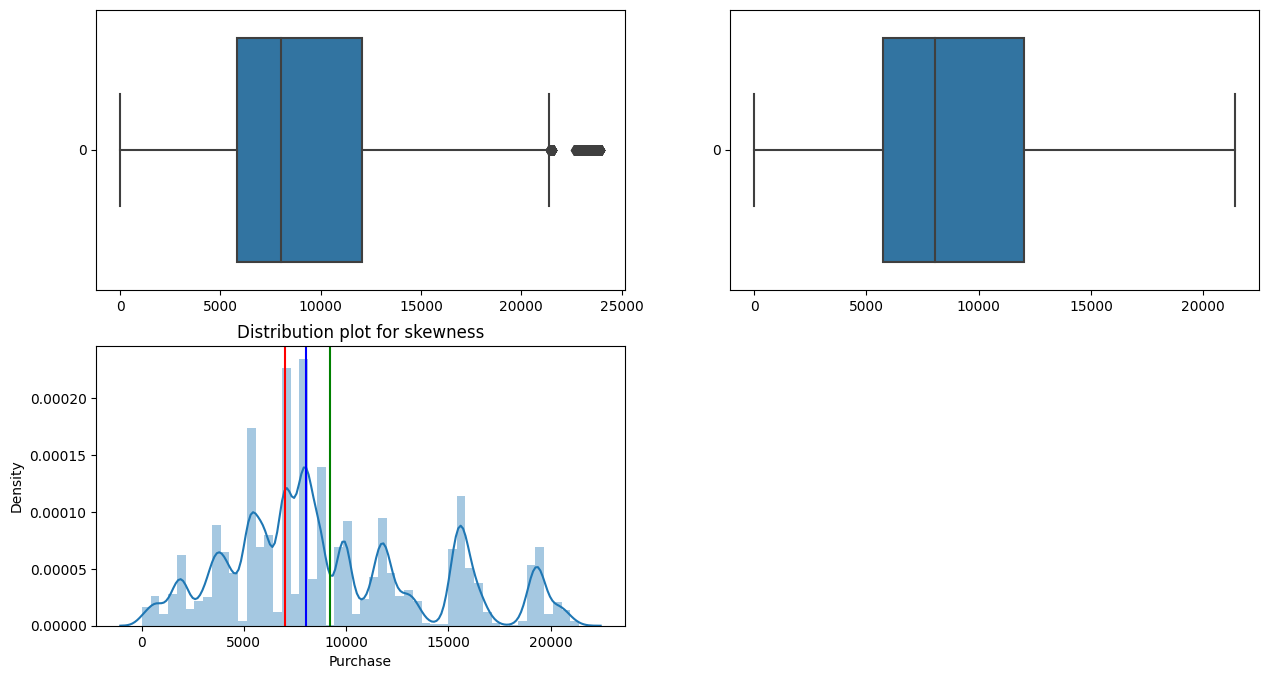

In [57]:
#comparision of boxplot before and after outliers
plt.figure(figsize=(15, 8))

# Create subplots for each distribution
plt.subplot(2, 2, 1)
sns.boxplot(df['Purchase'],orient="h")

plt.subplot(2, 2, 2)
sns.boxplot(df_new['Purchase'],orient="h")

plt.subplot(2,2,3)
sns.distplot(df_new["Purchase"])
plt.title("Distribution plot for skewness")
plt.ylabel('Density')
plt.xlabel('Purchase')
plt.axvline(df_new["Purchase"].mean(),color="g")
plt.axvline(df_new["Purchase"].median(),color="b")
plt.axvline(df_new["Purchase"].mode()[0],color="r")
plt.show()

In [ ]:
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Example: Detect outliers in the 'Purchase' column
outliers_purchase = detect_outliers(df, 'Product_Category')

In [ ]:
#Display outliers
outliers_purchase

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,241
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Method 2- Clip the values

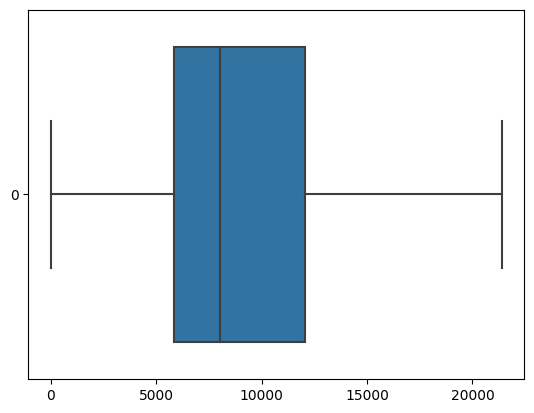

In [ ]:
sns.boxplot(np.clip(df["Purchase"],lower_limit.values[0],upper_limit.values[0]), orient='h')
plt.show()

In [ ]:
print(lower_limit)
print(upper_limit)

Purchase   -3523.5
dtype: float64
Purchase    21400.5
dtype: float64


In [ ]:
df_Purchase= df.copy()

In [ ]:
IQR = np.percentile(df_Purchase["Purchase"],75)-np.percentile(df_Purchase["Purchase"],25)
Q3 = np.percentile(df_Purchase["Purchase"],75)
Q1 = np.percentile(df_Purchase["Purchase"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print("UpperWhisker:",UpperWhisker)
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
(df_Purchase["Purchase"] > UpperWhisker).value_counts()

UpperWhisker: 21400.5
Q1 = 5823.0, Q3 = 12054.0, IQR = 6231.0


False    547391
True       2677
Name: Purchase, dtype: int64

In [58]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("~"*30)
    print(df.iloc[:,i].value_counts(normalize = True)*100)
    print("-"*50)
    print()

User_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1001680    0.186522
1004277    0.177978
1001941    0.163253
1001181    0.156708
1000889    0.149618
             ...   
1002690    0.001273
1002111    0.001273
1005810    0.001273
1004991    0.001273
1000708    0.001091
Name: User_ID, Length: 5891, dtype: float64
--------------------------------------------------

Product_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
               ...   
P00314842    0.000182
P00298842    0.000182
P00231642    0.000182
P00204442    0.000182
P00066342    0.000182
Name: Product_ID, Length: 3631, dtype: float64
--------------------------------------------------

Gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
M    75.310507
F    24.689493
Name: Gender, dtype: float64
--------------------------------------------------

Age
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51

In [59]:
for i in range(df.shape[1]):
    print(df.columns[i], "-", df[df.columns[i]].nunique())
    print("~"*20)
    print(df.iloc[:,i].unique())
    print("-"*100)
    print()

User_ID - 5891
~~~~~~~~~~~~~~~~~~~~
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------------------------------------

Product_ID - 3631
~~~~~~~~~~~~~~~~~~~~
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------------------------------------

Gender - 2
~~~~~~~~~~~~~~~~~~~~
['F' 'M']
----------------------------------------------------------------------------------------------------

Age - 7
~~~~~~~~~~~~~~~~~~~~
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
----------------------------------------------------------------------------------------------------

Occupation - 21
~~~~~~~~~~~~~~~~~~~~
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
----------------------------------------------------------------------------------------------------

City_Category - 3
~~~~~~~~~~~~~~~~~~~~
['A' 'C' 'B']
-

From above nunique function we get to know about most of the data seems to be Categorical
User_ID	and Product_ID and Purchase are the ones which can be used for differntiating
Gender,	Age, Occupation, City_Category,	Stay_In_Current_City_Years,	Marital_Status and Product_Category are categorical.
Most categories are of Occupation == Total 21 and Product_Categories that is 21 different product .

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


We can observe that

1. The mean of occupation is 8.07 and the ninimum value is 0.0 and maximum value is 20.0
2. the minimum purchase amount is 12.0 and the maximum purchases is 23961.0

In [60]:
df=data.copy()

In [61]:
df2=data.copy()

In [62]:
columns_to_convert = ['Occupation', 'Marital_Status', 'Product_Category', "Gender"]

# Create a new DataFrame with the selected columns converted to object type
converted_df = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
converted_df[columns_to_convert] = converted_df[columns_to_convert].astype(str)
df2.drop(columns=columns_to_convert, inplace=True)
merged_df = pd.concat([df2, converted_df[columns_to_convert]], axis=1)

In [63]:
merged_df.dtypes

User_ID                        int64
Product_ID                    object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
Purchase                       int64
Occupation                    object
Marital_Status                object
Product_Category              object
Gender                        object
dtype: object

In [64]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


User_Id



1.   The total count of the User_Id is 550068.
2.   The average User ID is approximately 1,003,029. This represents the central tendency of the User IDs in the dataset.
3. The standard deviation is relatively small at approximately 1,727.59, suggesting that User IDs do not vary widely from the mean. User IDs seem to be distributed closely around the mean.
4. The minimum User ID is 1,000,001, indicating the lowest User ID in the dataset.
5. The maximum User ID is 1,006,040, indicating the highest User ID in the dataset.





Purcahse


1.    There are 550,068 purchase records in the dataset, indicating that there are no missing values for purchases.
2.   The average purchase amount is approximately 9,263.97. This represents the central tendency of purchase amounts in the dataset. this represent the average spend by the Walmart customer.
3. The standard deviation is relatively high at approximately 5,023.07, suggesting that purchase amounts have a wide spread from the mean. There is considerable variability in purchase amounts.
4. The minimum purchase amount is 12.0, indicating the lowest purchase value in the dataset.
5. The maximum purchase amount is 23,961.0, indicating the highest purchase value in the dataset.


In [65]:
merged_df.describe(include="object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Occupation,550068,21,4,72308
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933
Gender,550068,2,M,414259





1. Product_Id-   There are 550,068 records in the dataset and 3631 unique product_Id available and "P00265242" appeared 1880 times.
2.   Age- There are 550,068 records in the dataset and 7 unique categories of Age. The highest number of customer are between age of 26-35 with 219587 frequency.
3. City_Category - This also have same records and 3 unique categories and Category B has the highest number of customer with 231173 for Walmart.
4. Occupation- This also have same records and 5 unique categories and Category 1 has the highest number of customer with 193821 frequency for Walmart.
5. Marital Status- This also have same records and 2 unique categories and Category 0- Unmaried has the highest number of customer with 324731 frequency for Walmart.
6. product_category- This also have same records and 20 unique categories and Category 5 has the highest number of customer with 150933 frequency.
7. Gender- This also have same records and 2 unique categories and Male has hishest number of frequency with 414259.



#comments about the other detail are on every graph and plot above.

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [67]:
import pandas as pd
import scipy.stats as stats

# Group data by Gender and calculate average purchase amount
gender_purchase = data.groupby('Gender')['Purchase'].mean()

# Split the data into two groups: Female and Male
female_purchase = data[data['Gender'] == 'F']['Purchase']
male_purchase = data[data['Gender'] == 'M']['Purchase']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(male_purchase, female_purchase)
print(p_value)
print(t_statistic)
# Define significance level (alpha)
alpha = 0.01


# Print the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending between females and males.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending between females and males.")


0.0
44.837957934353966
Reject the null hypothesis: There is a significant difference in spending between females and males.


In [68]:
# Group data by Gender and calculate average purchase amount
gender_purchase = data.groupby('Gender')['Purchase'].mean()

# Split the data into two groups: Female and Male
female_purchase = data[data['Gender'] == 'F']['Purchase']
male_purchase = data[data['Gender'] == 'M']['Purchase']
print(gender_purchase)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


# Answering questions (50 Points)

### Are women spending more money per transaction than men? Why or Why not? (10 Points)

### as per analysis women are spending less money as compared to male per transaction

---


Female_mean = 8734.56
Male_mean = 9437.52

As per transaction expense male spent higher than female.

One possible explanation that can be gleaned from the dataset is that products intended for females were indeed purchased, but it appears that their spouses made the payments or acquired the items on their behalf.




As per dataset offering new products, discounts, and promotions specifically tailored to female customers in order to boost their spending during sales events.


#4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)


##Confidence interval of Male

In [83]:
# Filter the DataFrame to include only male respondents
df_Male = df[df['Gender'] == 'M']

bootstrapped_male_survey = []

# Number of bootstrap iterations
num_iterations = 2000

# Perform bootstrapping
for _ in range(num_iterations):
    bootstrapped_samples = np.random.choice(df_Male['Purchase'], size=5000, replace=True)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_male_survey.append(bootstrapped_mean)

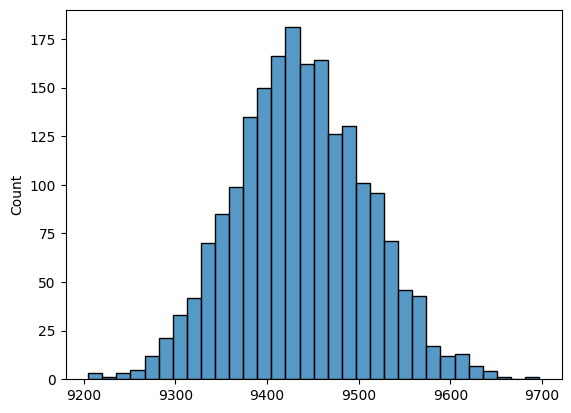

In [84]:
sns.histplot(bootstrapped_male_survey)
plt.show()

#As we can see after taking sample size = 5000 for men and number of iteration= 2000.

This histplot can be seen the perfect bell curve showing the Gaussion Distribution.

Below we have found out all the Confidence Interval.


##Confidence Interval of Male Purchase= 90

In [107]:
# Specify the desired confidence level (e.g., 90%)
confidence_level = 0.90

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_male_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_male_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (90.0%): (9320.05, 9557.33)


OR

In [112]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_male_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)

Confidence Interval (90%): [9320.05 9557.33]


##Confidence Interval of Male Purchase= 95

In [113]:
# Specify the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_male_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_male_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (95.0%): (9300.81, 9578.2)


OR

In [114]:
# 95% Confidence Interval
CI95= (np.percentile(bootstrapped_male_survey, [2.5, 97.5]).round(2))
print(f"Confidence Interval (95%):", CI95)

Confidence Interval (95%): [9300.81 9578.2 ]


##Confidence Interval of Male Purchase= 99

In [108]:
# Specify the desired confidence level (e.g., 99%)
confidence_level = 0.99

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_male_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_male_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (99.0%): (9264.83, 9622.27)


OR

In [115]:
# 95% Confidence Interval
CI99= (np.percentile(bootstrapped_male_survey, [0.5, 99.5]).round(2))
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (99%): [9264.83 9622.27]


##Confidence interval of Female

In [133]:
# Filter the DataFrame to include only female respondents
df_Female = df[df['Gender'] == 'F']

# Initialize an empty list to store bootstrapped means
bootstrapped_female_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(df_Female['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_female_survey.append(bootstrapped_mean)

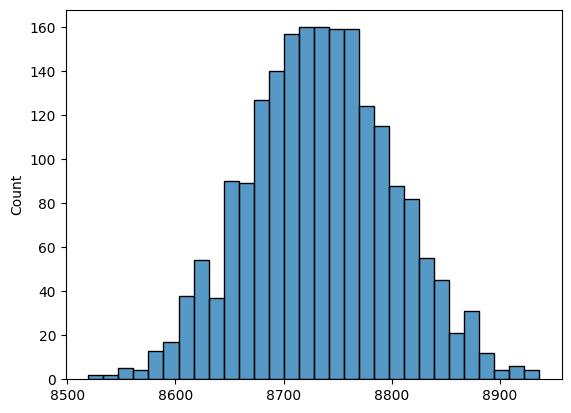

In [134]:
sns.histplot(bootstrapped_female_survey)
plt.show()

#As we can see after taking sample size = 5000 for female and number of iteration= 2000.

This histplot can be seen the perfect bell curve showing the Gaussion Distribution or Normal Distribution.

Below we have found out all the Confidence Interval.

##Confidence Interval of Female Purchase= 90

In [135]:
# Specify the desired confidence level (e.g., 90%)
confidence_level = 0.90

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_female_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_female_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (90.0%): (8623.42, 8845.93)


OR

In [138]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_female_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)

Confidence Interval (90%): [8623.42 8845.93]


##Confidence Interval of Male Purchase= 95

In [137]:
# Specify the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_female_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_female_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (95.0%): (8604.93, 8868.65)


OR

In [139]:
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_female_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (90%):", CI95)

Confidence Interval (90%): [8604.93 8868.65]


##Confidence Interval of Male Purchase= 99

In [136]:
# Specify the desired confidence level (e.g., 99%)
confidence_level = 0.99

# Calculate the lower and upper percentiles based on the confidence level
alpha = (1 - confidence_level) / 2
lower_percentile = np.percentile(bootstrapped_female_survey, 100 * alpha).round(2)
upper_percentile = np.percentile(bootstrapped_female_survey, 100 * (1 - alpha)).round(2)

# Print the confidence interval
print(f"Confidence Interval ({100*confidence_level}%): ({lower_percentile}, {upper_percentile})")

Confidence Interval (99.0%): (8566.55, 8907.89)


OR

In [142]:
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_female_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (90%):", CI99)

Confidence Interval (90%): [8566.55 8907.89]


#Confidence interval on whole data

##90% Confidence Interval for Male and Female both

In [74]:
# Separate data for females and males
female_data = data[data['Gender'] == 'F']
male_data = data[data['Gender'] == 'M']

# Define confidence level and alpha (significance level)
confidence_level = 0.90  # You can choose the desired confidence level (e.g., 0.90 for a 90% confidence interval)
alpha = 1 - confidence_level

# Calculate the mean and standard error for females
mean_female = female_data['Purchase'].mean()
std_error_female = stats.sem(female_data['Purchase'])  # Standard error of the mean

# Calculate the mean and standard error for males
mean_male = male_data['Purchase'].mean()
std_error_male = stats.sem(male_data['Purchase'])  # Standard error of the mean

# Calculate the confidence intervals
ci_female = stats.t.interval(confidence_level, df=len(female_data)-1, loc=mean_female, scale=std_error_female)
ci_male = stats.t.interval(confidence_level, df=len(male_data)-1, loc=mean_male, scale=std_error_male)

# Print the confidence intervals
print(f"Confidence Interval for Female Customers: {ci_female}")
print(f"Confidence Interval for Male Customers: {ci_male}")

Confidence Interval for Female Customers: (8713.287689504074, 8755.843840806878)
Confidence Interval for Male Customers: (9424.512468203842, 9450.539612740688)


##95% Confidence Interval for male and Female both

In [73]:
# Separate data for females and males
female_data = data[data['Gender'] == 'F']
male_data = data[data['Gender'] == 'M']

# Define confidence level and alpha (significance level)
confidence_level = 0.95  # You can choose the desired confidence level (e.g., 0.95 for a 95% confidence interval)
alpha = 1 - confidence_level

# Calculate the mean and standard error for females
mean_female = female_data['Purchase'].mean()
std_error_female = stats.sem(female_data['Purchase'])  # Standard error of the mean

# Calculate the mean and standard error for males
mean_male = male_data['Purchase'].mean()
std_error_male = stats.sem(male_data['Purchase'])  # Standard error of the mean

# Calculate the confidence intervals
ci_female = stats.t.interval(confidence_level, df=len(female_data)-1, loc=mean_female, scale=std_error_female)
ci_male = stats.t.interval(confidence_level, df=len(male_data)-1, loc=mean_male, scale=std_error_male)

# Print the confidence intervals
print(f"Confidence Interval for Female Customers: {ci_female}")
print(f"Confidence Interval for Male Customers: {ci_male}")

Confidence Interval for Female Customers: (8709.21132117373, 8759.92020913722)
Confidence Interval for Male Customers: (9422.019402055814, 9453.032678888716)


##99% Confidence Interval for Male and Female both

In [75]:
# Separate data for females and males
female_data = data[data['Gender'] == 'F']
male_data = data[data['Gender'] == 'M']

# Define confidence level and alpha (significance level)
confidence_level = 0.99  # You can choose the desired confidence level (e.g., 0.99 for a 99% confidence interval)
alpha = 1 - confidence_level

# Calculate the mean and standard error for females
mean_female = female_data['Purchase'].mean()
std_error_female = stats.sem(female_data['Purchase'])  # Standard error of the mean

# Calculate the mean and standard error for males
mean_male = male_data['Purchase'].mean()
std_error_male = stats.sem(male_data['Purchase'])  # Standard error of the mean

# Calculate the confidence intervals
ci_female = stats.t.interval(confidence_level, df=len(female_data)-1, loc=mean_female, scale=std_error_female)
ci_male = stats.t.interval(confidence_level, df=len(male_data)-1, loc=mean_male, scale=std_error_male)

# Print the confidence intervals
print(f"Confidence Interval for Female Customers: {ci_female}")
print(f"Confidence Interval for Male Customers: {ci_male}")

Confidence Interval for Female Customers: (8701.24420611832, 8767.887324192632)
Confidence Interval for Male Customers: (9417.14682877079, 9457.90525217374)


# 4.3- Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [143]:
# Check if confidence intervals overlap
overlap = (ci_female[1] >= ci_male[0]) and (ci_female[0] <= ci_male[1])

if overlap:
    print("The confidence intervals of average male and female spending overlap.")
else:
    print("The confidence intervals of average male and female spending do not overlap.")

The confidence intervals of average male and female spending do not overlap.


In conclusion, if the confidence intervals of average male and female spending are overlapping, it suggests that Walmart can treat both customer groups similarly in terms of marketing and product offerings. Leveraging this conclusion, Walmart can focus on providing a consistent and customer-centric shopping experience while monitoring and adapting to evolving trends and customer preferences.

#4.4- Results when the same activity is performed for Married vs Unmarried

##4.4.1 - Confidence Interval for Purchase of Married customer

In [156]:
df_married= df[df["Marital_Status_category"]=="Married"]["Purchase"]

In [159]:
df_Unmarried = df[df["Marital_Status_category"] == "Unmarried"]["Purchase"]

In [168]:
print("Mean of purchase for married customer:", (df_married.mean()).round(2))
print("Mean of purchase for unmarried customer:", (df_Unmarried.mean()).round(2))

Mean of purchase for married customer: 9261.17
Mean of purchase for unmarried customer: 9265.91


We can observe that the average spending of married and unmarried customers are nearly same i.e. married- 9261.17 and unmarried- 9265.91

In [169]:
# Filter the DataFrame to include only female respondents
df_married = df[df['Marital_Status_category'] == 'Married']

# Initialize an empty list to store bootstrapped means
bootstrapped_married_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(df_married['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_married_survey.append(bootstrapped_mean)

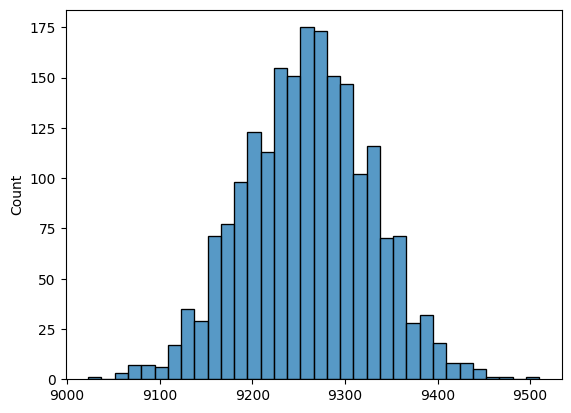

In [172]:
sns.histplot(bootstrapped_married_survey)
plt.show()

#As we can see after taking sample size = 5000 for female and number of iteration= 2000.

This histplot can be seen the perfect bell curve showing the Gaussion Distribution or Normal Distribution.

Below we have found out all the Confidence Interval.

In [176]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_married_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)

Confidence Interval (90%): [9150.63 9367.45]


In [177]:
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_married_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)

Confidence Interval (95%): [9129.68 9390.62]


In [178]:
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_married_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (99%): [9079.4  9433.72]


##4.4.2 - Confidence Interval for Purchase of Unmarried customer

In [174]:
# Filter the DataFrame to include only Unmarried respondents
df_unmarried = df[df['Marital_Status_category'] == 'Unmarried']

# Initialize an empty list to store bootstrapped means
bootstrapped_unmarried_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(df_unmarried['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_unmarried_survey.append(bootstrapped_mean)

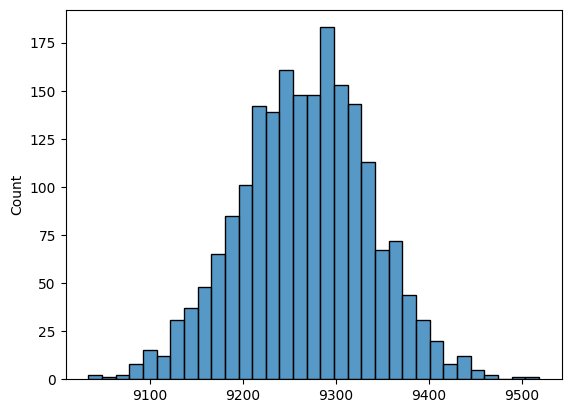

In [175]:
sns.histplot(bootstrapped_unmarried_survey)
plt.show()

#As we can see after taking sample size = 5000 for female and number of iteration= 2000.

This histplot can be seen the perfect bell curve showing the Gaussion Distribution or Normal Distribution.

Below we have found out all the Confidence Interval.

In [204]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_unmarried_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)

Confidence Interval (90%): [9147.56 9378.66]


In [181]:
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_unmarried_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)

Confidence Interval (95%): [9127.81 9398.61]


In [179]:
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_unmarried_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (99%): [9089.31 9442.62]


#4.5- Results when the same activity is performed for Age (10 Points)

In [185]:
df["Age"].value_counts().reset_index()

,index,Age
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [186]:
df_Age_0_17 = df[df["Age"] == "0-17"]["Purchase"]

In [187]:
# Filter the DataFrame to include only 0-17 respondents
Age_0_17 = df[df['Age'] == '0-17']

# Initialize an empty list to store bootstrapped means
bootstrapped_upto17_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(Age_0_17['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_upto17_survey.append(bootstrapped_mean)

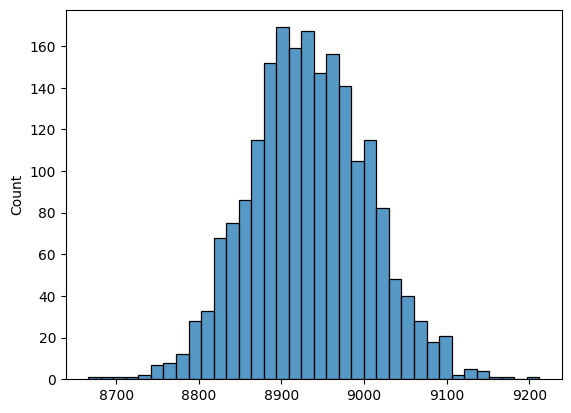

In [188]:
sns.histplot(bootstrapped_upto17_survey)
plt.show()

In [205]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_upto17_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_upto17_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_upto17_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [8821.12 9051.39]
Confidence Interval (95%): [8795.98 9078.42]
Confidence Interval (99%): [8754.85 9124.21]


In [190]:
# Filter the DataFrame to include only 18-25 respondents
df_Age_18_25 = df[df['Age'] == '18-25']

# Initialize an empty list to store bootstrapped means
bootstrapped_18_25_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(df_Age_18_25['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_18_25_survey.append(bootstrapped_mean)

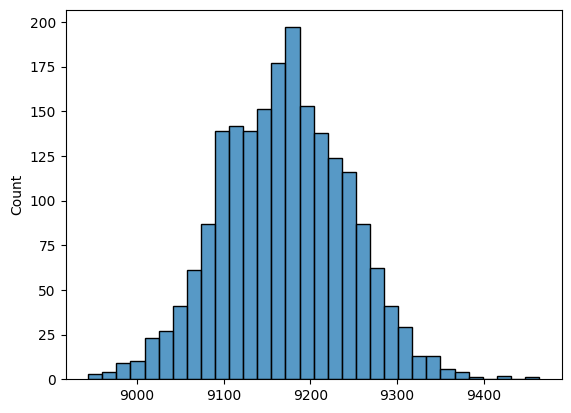

In [203]:
sns.histplot(bootstrapped_18_25_survey)
plt.show()

In [206]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_18_25_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_18_25_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_18_25_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9052.17 9289.8 ]
Confidence Interval (95%): [9026.58 9311.14]
Confidence Interval (99%): [8987.53 9353.15]


In [192]:
# Filter the DataFrame to include only 26-35 respondents
df_Age_26_35 = df[df['Age'] == '26-35']

# Initialize an empty list to store bootstrapped means
bootstrapped_26_35_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(df_Age_26_35['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_26_35_survey.append(bootstrapped_mean)

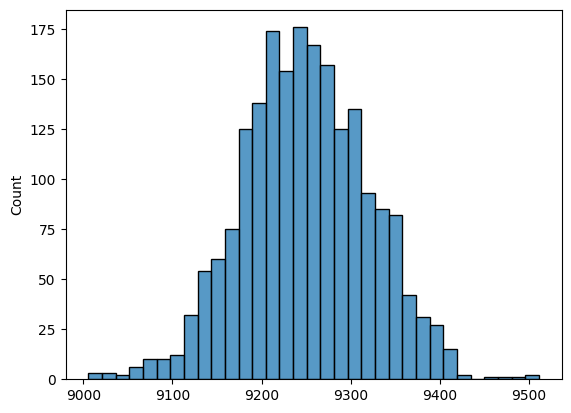

In [202]:
sns.histplot(bootstrapped_26_35_survey)
plt.show()

In [212]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_26_35_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_26_35_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_26_35_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9136.31 9364.67]
Confidence Interval (95%): [9114.9  9388.59]
Confidence Interval (99%): [9058.09 9413.49]


In [193]:
# Filter the DataFrame to include only 36-45 respondents
Age_36_45 = df[df['Age'] == '36-45']

# Initialize an empty list to store bootstrapped means
bootstrapped_36_45_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(Age_36_45['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_36_45_survey.append(bootstrapped_mean)

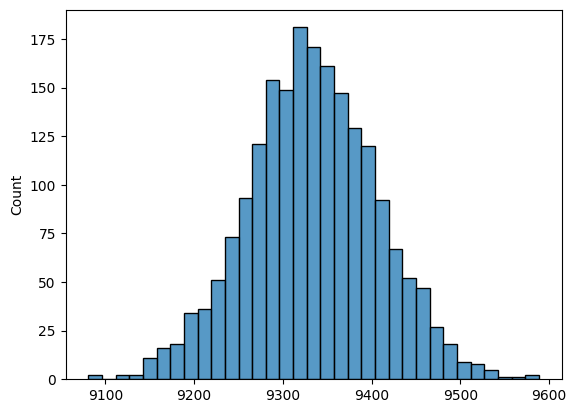

In [201]:
sns.histplot(bootstrapped_36_45_survey)
plt.show()

In [211]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_36_45_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_36_45_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_36_45_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9213.04 9455.09]
Confidence Interval (95%): [9188.3  9473.73]
Confidence Interval (99%): [9148.45 9525.82]


In [194]:
# Filter the DataFrame to include only 46-50 respondents
Age_46_50 = df[df['Age'] == '46-50']

# Initialize an empty list to store bootstrapped means
bootstrapped_46_50_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(Age_46_50['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_46_50_survey.append(bootstrapped_mean)

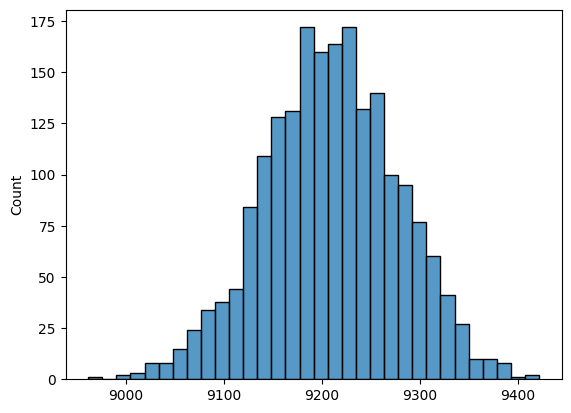

In [200]:
sns.histplot(bootstrapped_46_50_survey)
plt.show()

In [210]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_46_50_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_46_50_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_46_50_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9093.11 9320.68]
Confidence Interval (95%): [9069.98 9340.  ]
Confidence Interval (99%): [9030.78 9378.44]


In [198]:
# Filter the DataFrame to include only 51-55 respondents
Age_51_55 = df[df['Age'] == '51-55']

# Initialize an empty list to store bootstrapped means
bootstrapped_51_55_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(Age_51_55['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_51_55_survey.append(bootstrapped_mean)

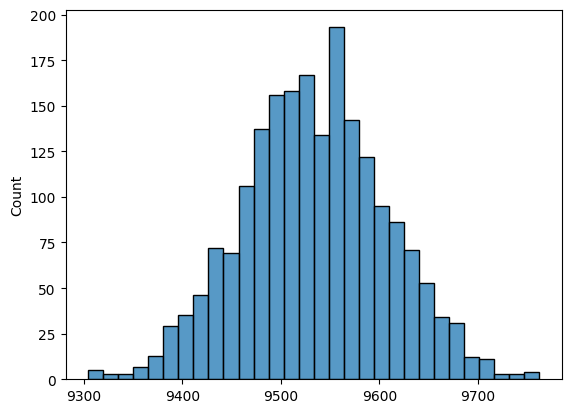

In [199]:
sns.histplot(bootstrapped_51_55_survey)
plt.show()

In [209]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_51_55_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_51_55_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_51_55_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9414.74 9654.5 ]
Confidence Interval (95%): [9389.99 9678.26]
Confidence Interval (99%): [9344.4 9714.5]


In [195]:
# Filter the DataFrame to include only 55+ respondents
Age_55_plus = df[df['Age'] == '55+']

# Initialize an empty list to store bootstrapped means
bootstrapped_55_plus_survey = []

# Number of bootstrap iterations
num_iterations = 2000
# Perform bootstrapping
for _ in range(num_iterations):
    # Generate a random sample with replacement from a column of your choice
    # For example, if you want to bootstrap the 'Purchase' column:
    bootstrapped_samples = np.random.choice(Age_55_plus['Purchase'], size=5000, replace=True)

    # Calculate the mean of the bootstrapped sample and append it to the list
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_55_plus_survey.append(bootstrapped_mean)

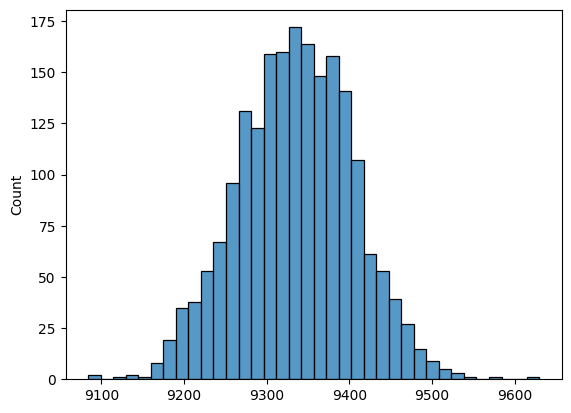

In [196]:
sns.histplot(bootstrapped_55_plus_survey)
plt.show()

In [207]:
# 90% Confidence Interval
CI90= np.percentile(bootstrapped_55_plus_survey, [5, 95]).round(2)
print(f"Confidence Interval (90%):", CI90)
# 95% Confidence Interval
CI95= np.percentile(bootstrapped_55_plus_survey, [2.5, 97.5]).round(2)
print(f"Confidence Interval (95%):", CI95)
# 99% Confidence Interval
CI99= np.percentile(bootstrapped_55_plus_survey, [0.5, 99.5]).round(2)
print(f"Confidence Interval (99%):", CI99)

Confidence Interval (90%): [9218.77 9447.82]
Confidence Interval (95%): [9198.82 9467.98]
Confidence Interval (99%): [9166.25 9508.41]


#CLT

In [213]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


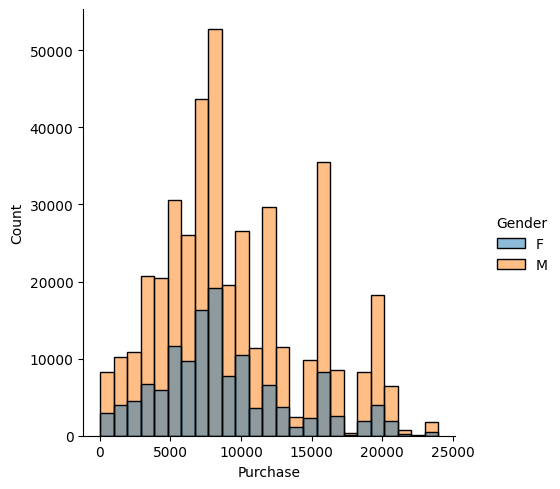

In [214]:
sns.displot( x='Purchase', data=df, hue='Gender', bins=25)
plt.show()

so, Here we are taking 300 random samples from the data and take its mean. we do this 1000 times.

According to CLT, it should be normally distributed.

In [215]:
sample_size = 1000
Iterations = 2000
female_expense_mean=[df[df['Gender']=='F']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]
male_expense_mean=[df[df['Gender']=='M']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

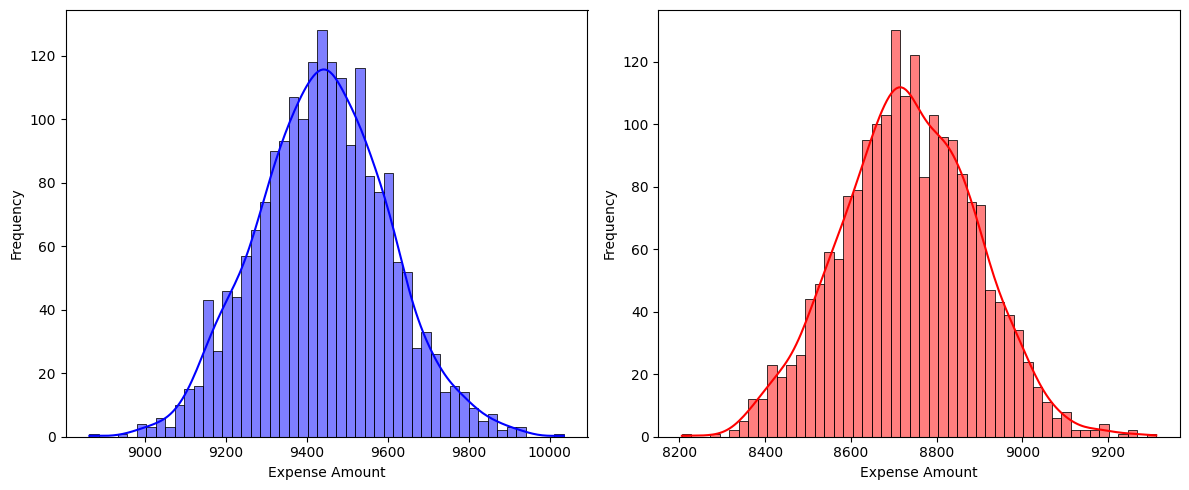

In [233]:
plt.figure(figsize=(12, 5))

# Subplot 1: Male Expense Distribution
plt.subplot(1, 2, 1)
sns.histplot(male_expense_mean, bins=50, kde=True, color='blue')
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")

# Subplot 2: Female Expense Distribution
plt.subplot(1, 2, 2)
sns.histplot(female_expense_mean, bins=50, kde=True, color='red')
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Married and Unmarried purchase comparison

In [234]:
married_expense_mean=[df[df['Marital_Status_category']=='Married']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]
unmarried_expense_mean=[df[df['Marital_Status_category']=='Unmarried']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

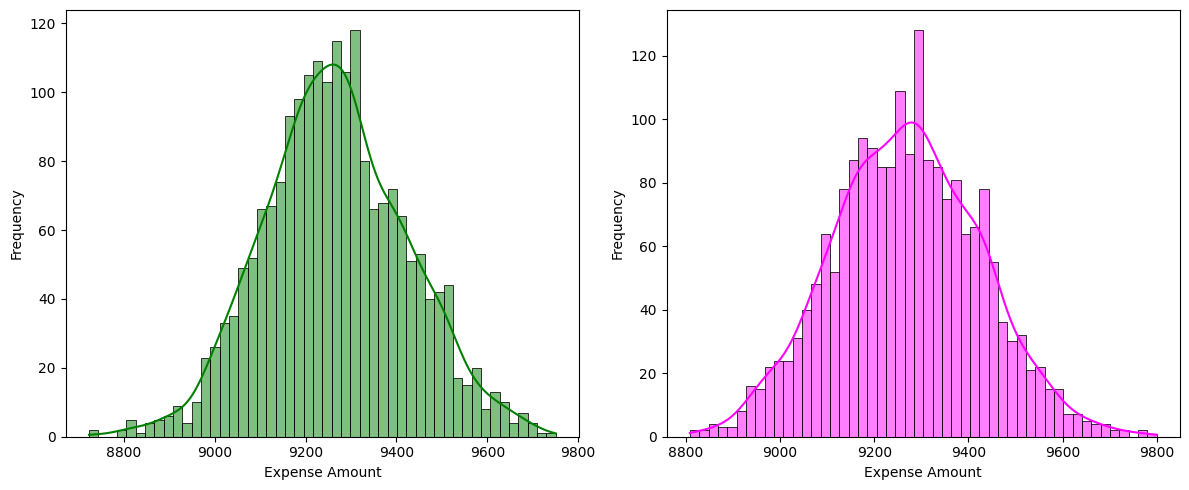

In [237]:
plt.figure(figsize=(12, 5))

# Subplot 1: Male Expense Distribution
plt.subplot(1, 2, 1)
sns.histplot(married_expense_mean, bins=50, kde=True, color='green')
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")

# Subplot 2: Female Expense Distribution
plt.subplot(1, 2, 2)
sns.histplot(unmarried_expense_mean, bins=50, kde=True, color='magenta')
plt.xlabel("Expense Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

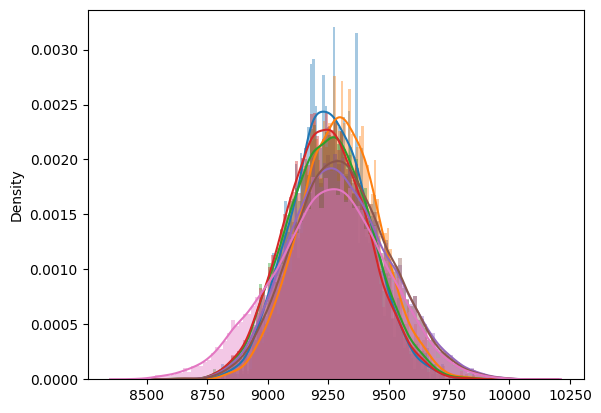

In [238]:
age_group_expense_mean = []
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    age_group_expense_mean.append([df[df['Age']== val ]['Purchase'].sample(sample_size).mean() for i in range(Iterations)])
    sns.distplot(age_group_expense_mean,bins=100)

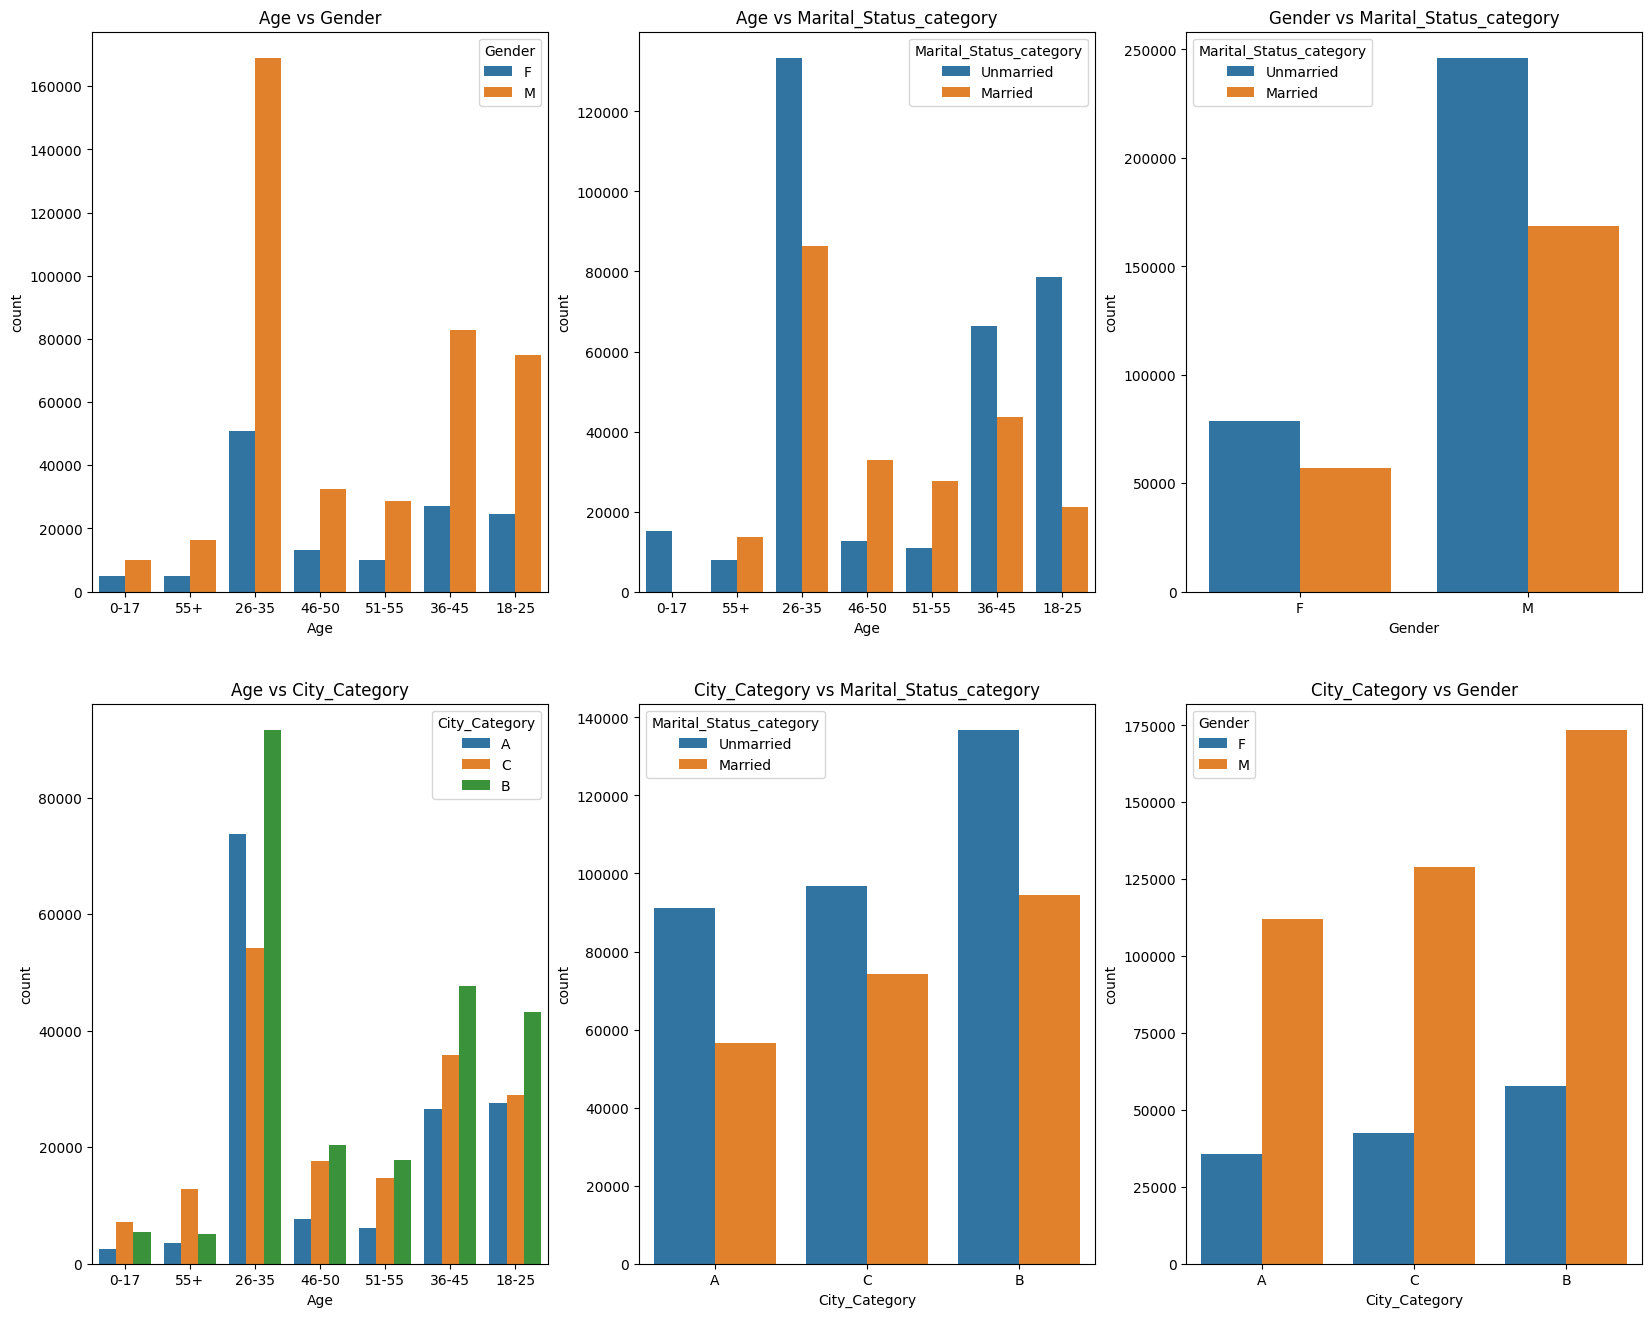

In [239]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20,16))
sns.countplot(x = "Age", hue ="Gender", data = df, ax=axis[0,0])
sns.countplot(x = "Age", hue ="Marital_Status_category", data = df, ax=axis[0,1])
sns.countplot(x = "Gender", hue ="Marital_Status_category", data = df, ax=axis[0,2])
sns.countplot(x = "Age", hue ="City_Category", data = df, ax=axis[1,0])
sns.countplot(x = "City_Category", hue ="Marital_Status_category", data = df, ax=axis[1,1])
sns.countplot(x = "City_Category", hue ="Gender", data = df, ax=axis[1,2])

axis[0,0].set_title("Age vs Gender")
axis[0,1].set_title("Age vs Marital_Status_category")
axis[0,2].set_title("Gender vs Marital_Status_category")
axis[1,0].set_title("Age vs City_Category")
axis[1,1].set_title("City_Category vs Marital_Status_category")
axis[1,2].set_title("City_Category vs Gender")

plt.show()

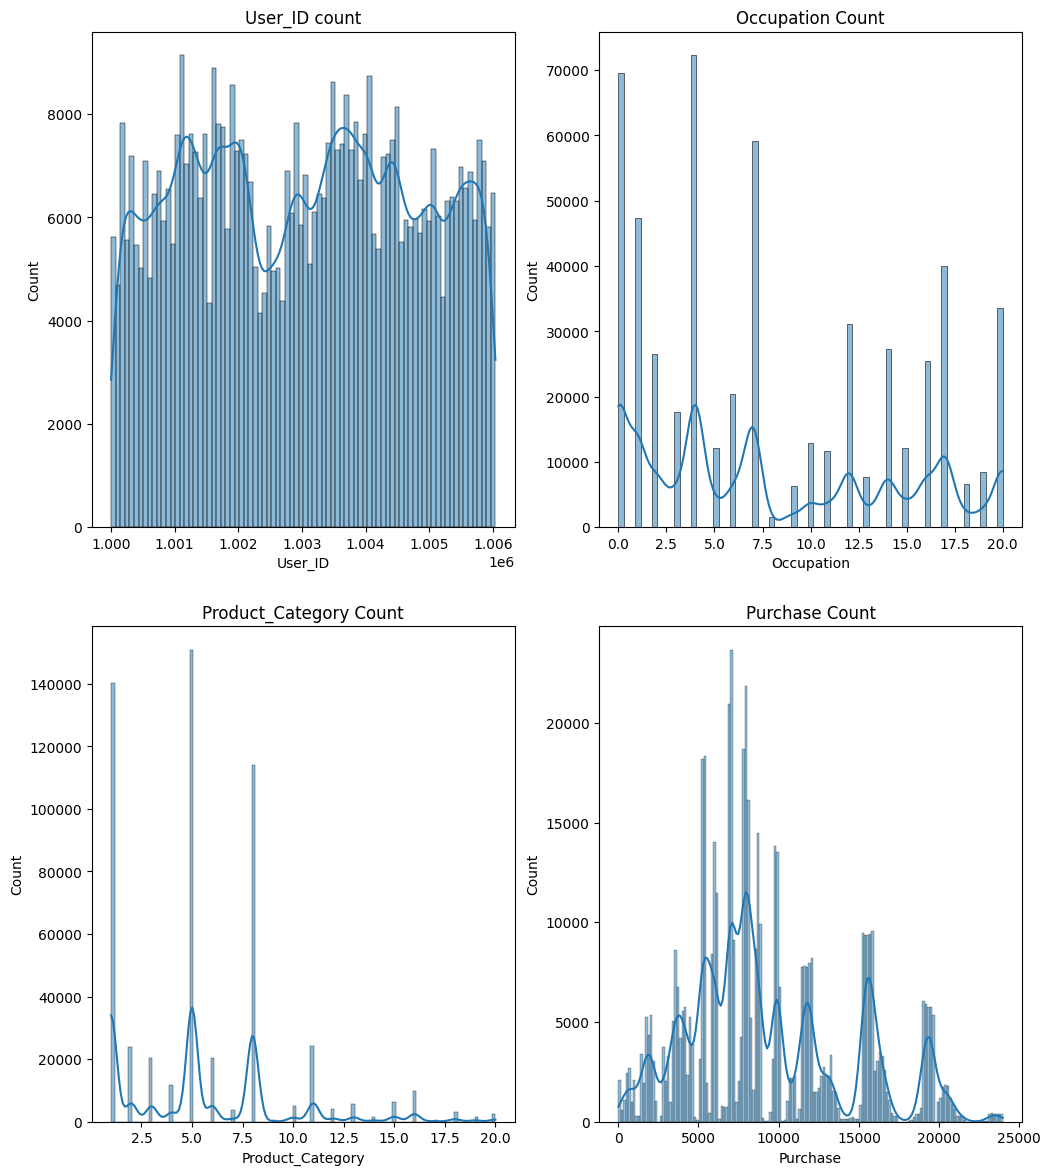

In [240]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="User_ID", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Product_Category", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Purchase", kde=True, ax=axis[1,1])
axis[0,0].set_title("User_ID count")
axis[0,1].set_title("Occupation Count")
axis[1,0].set_title("Product_Category Count")
axis[1,1].set_title("Purchase Count")

plt.show()

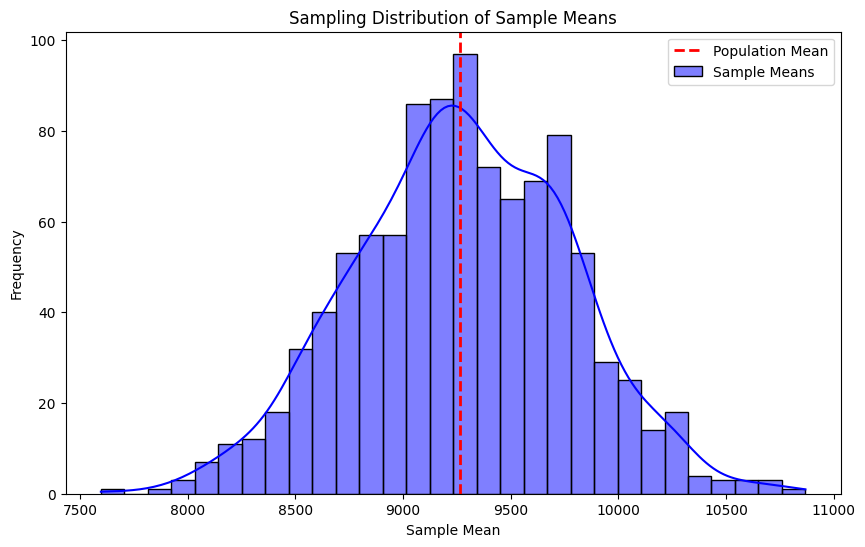

Standard Error of Sample Means: 502.31
95% Confidence Interval for Population Mean: (8279.465986571342, 10248.47143934691)


In [ ]:
# Define the number of samples and sample size
num_samples = 1000  # Number of samples to draw
sample_size = 100   # Size of each sample

# Initialize an empty list to store sample means
sample_means = []

# Perform the sampling and calculate sample means
for _ in range(num_samples):
    sample = np.random.choice(data['Purchase'], size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Calculate the population mean and standard deviation
population_mean = data['Purchase'].mean()
population_std = data['Purchase'].std()

# Calculate the standard error of the sample means
standard_error = population_std / np.sqrt(sample_size)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='blue', label='Sample Means')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.title('Sampling Distribution of Sample Means')
plt.show()

# Calculate and print the standard error of the sample means
print(f"Standard Error of Sample Means: {standard_error:.2f}")

# Calculate the 95% confidence interval for the population mean
z_score = norm.ppf(0.975)  # For a 95% confidence interval
margin_of_error = z_score * standard_error
confidence_interval = (population_mean - margin_of_error, population_mean + margin_of_error)
print(f"95% Confidence Interval for Population Mean: {confidence_interval}")

# Perform the same activity for Married vs Unmarried and Age For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

In [241]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


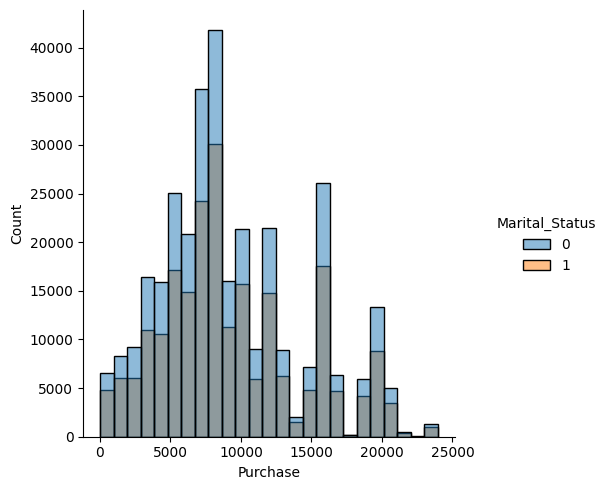

In [242]:
sns.displot( x='Purchase', data=df, hue='Marital_Status', bins=25)

In [243]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


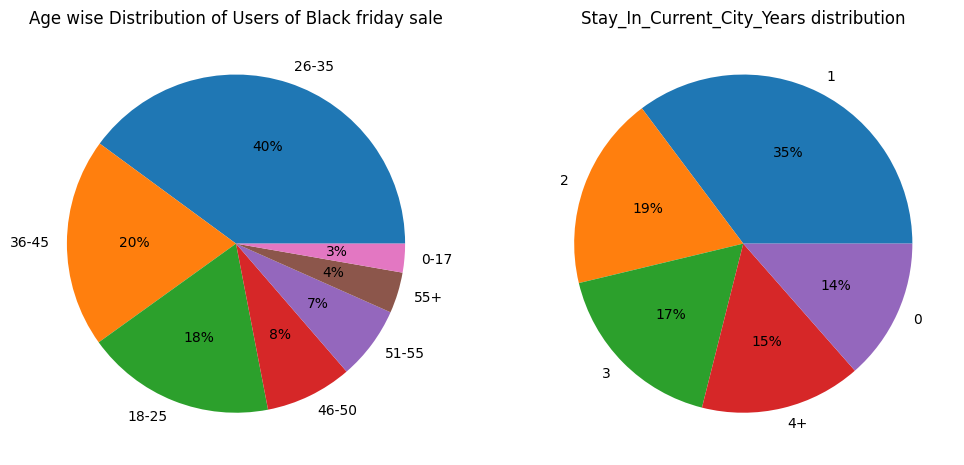

In [246]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data1 = df['Age'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data1.values, labels=data1.index, autopct='%.0f%%') # colors=palette_color)
axs[0].set_title("Age wise Distribution of Users of Black friday sale")

data1 = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data1.values, labels=data1.index, autopct='%.0f%%')# colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years distribution")
plt.show()

#Insights-

1. The dataset includes customers of various ages, with the majority falling in the 26-35 age group.
2. There is a fairly even distribution of male and female customers.
3. The dataset includes customers from different cities, with City_Category 'B' having the most representation.
4.  Maximum i.e. 75% are the male population whereas 25% are female customers.
5. The purchase amount varies widely, with some customers making high-value purchases.
6. The Product_Category column indicates that customers purchase (1,5,8) of product categories frequently and have highest sales.
7.
8. Unmarried male > Married male > Unmarried female> Married female is the flow of the Users purchase value.
9. People who are living in city for one year are purchasing more frequently and visit store as they have more share in purchasing.
10. Purchase had some outliers.
11. In all the product category 26-35 age group have highest count of purchase.
12. The customer who are occupation category (0, 4 and 7) purhcase more as compared to others.
13. The average spend of male customer is 9437.53 and Female is 8734.57 which has huge differnce between purchasing power of male and female customer.

# And there are details or insights mentioned with every chart above.


#Business recommendations based on the analysis of the dataset:

1. Targeted Marketing: Tailor marketing campaigns to appeal to both male and female customers. Use gender-neutral imagery and messaging to ensure inclusivity.

2. Age-Based Promotions: Create age-specific promotions and product bundles. For example, consider special offers for customers in the 26-35 age group, which is the largest segment and focus on 0-17 age group, as they are adults and considers offers for them to target that age group. Age plays a crucial role in purchasing power, products appealing to older people are pretty rare as per the data.there could be more awareness created about the products sold at supermarket.

3. Occupation-Aware Content: Customize product recommendations and content based on occupation groups. Highlight products relevant to different professions to attract a diverse audience.

4. Regional Strategies: Develop location-specific marketing strategies. Focus on city categories (A) to address unique needs and preferences as City B have highest sales share among all three City Category. We should come up with offers according to City category and purchasing power of customers.

5. Inclusive Approach: Provide a consistent shopping experience for both single and married customers. Avoid overly gendered or marital status-specific marketing.

6. Product Diversity: Ensure a diverse range of products across categories. Stock products that cater to various tastes and interests, reflecting the diversity of customer preferences. As we can see product Category (5,1,8) have highest sale count therefore maitaining their stock is important and the product category (20,19,14,17,9) we should focus on these and come up with offer to attrack customers to increase the sale of these.

7. High-Value Customer Recognition: Identify and reward high-value customers based on their purchase behavior. Implement loyalty programs or exclusive offers to retain these customers.

8. Inventory Management: Maintain an inventory that reflects the popularity of products among different customer segments i.e. product catgory (5,1,8). Ensure product availability based on demand.

9. Product to attract Female customers are lagging as we can see less involvement of women , so to increase the revenue we need to offer discount and more product category to increase the female involvement which will boost sales.

10. Married and unmarried customers tend to have no difference in spending patterns, but they do have significant differences in product patterns, targteting those products will be a good start

11. Based on the demonstrated consistency of the data adhering to the Central Limit Theorem and exhibiting nearly identical mean and median values even when sampled, it is highly recommended to rely on these statistical measures as robust indicators of central tendency for this dataset.



These actionable recommendations focus on customer segmentation, inclusivity, and adaptation to customer preferences. Implementing these strategies can lead to improved customer satisfaction and increased sales.